In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

In [126]:
bklyn = pd.read_csv('BK_YelpPriceFreqPct_NTAIncDist.csv')

In [127]:
bklyn.columns

Index(['Unnamed: 0', 'NTACode', 'price_1', 'price_2', 'price_3', 'price_4',
       'MISSING', 'NTAName', 'Households', 'pct_0-25k', 'pct_25k-50k',
       'pct_50k-75k', 'pct_75k-100k', 'pct_100k-125k', 'pct_125k-150k',
       'pct_> 150k', 'latitude', 'longitude', 'geometry', 'num_0-25k',
       'num_25k-50k', 'num_50k-75k', 'num_75k-100k', 'num_100k-125k',
       'num_125k-150k', 'num_> 150k'],
      dtype='object')

In [128]:
bklyn['density'] = (bklyn10['price_1'] + bklyn10['price_2'] + bklyn10['price_3'] + bklyn10['price_4'] + bklyn10['MISSING'])/ bklyn10['Households']

In [129]:
bklyn['Low_Income'] = bklyn['pct_0-25k'] + bklyn['pct_25k-50k']
bklyn['Middle_Income'] = bklyn['pct_50k-75k'] + bklyn['pct_75k-100k']
bklyn['High_Income'] = bklyn['pct_100k-125k'] + bklyn['pct_125k-150k'] + bklyn['pct_> 150k']

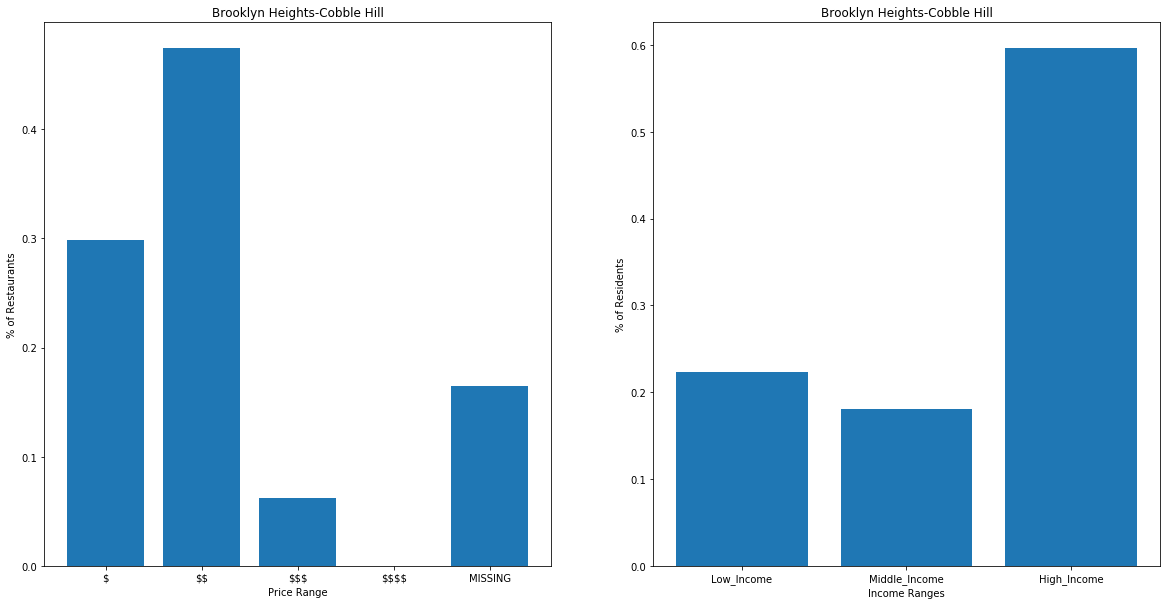

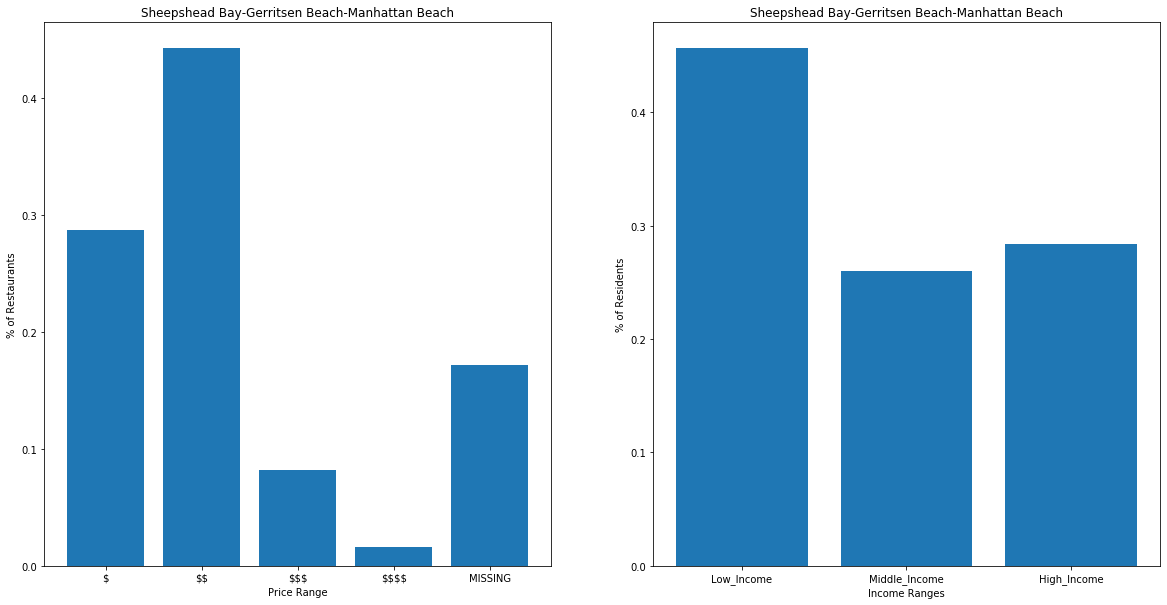

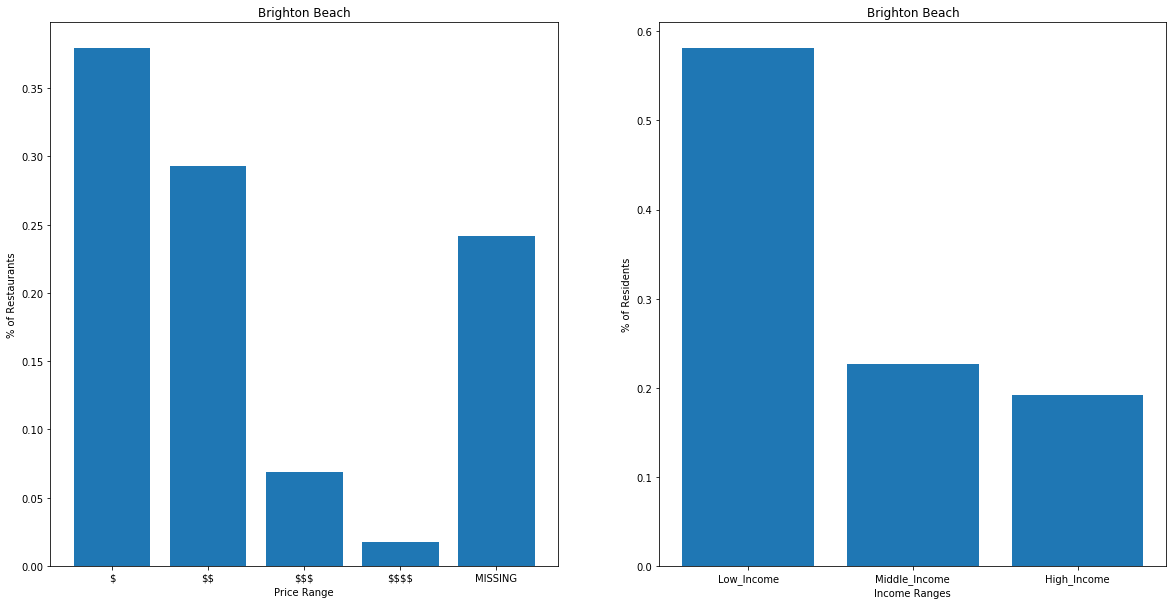

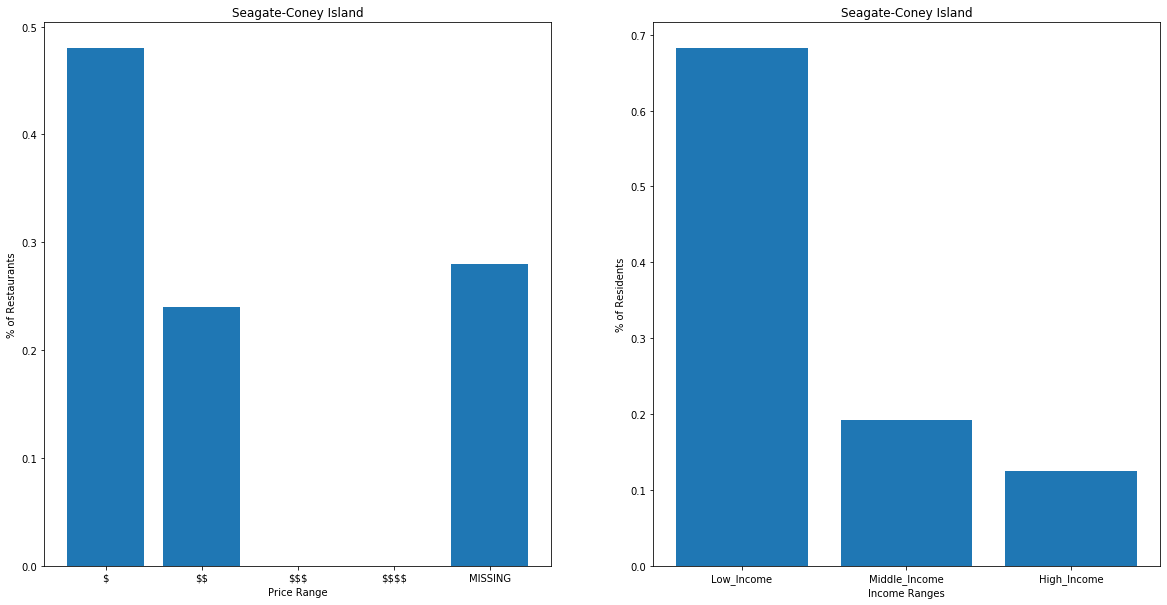

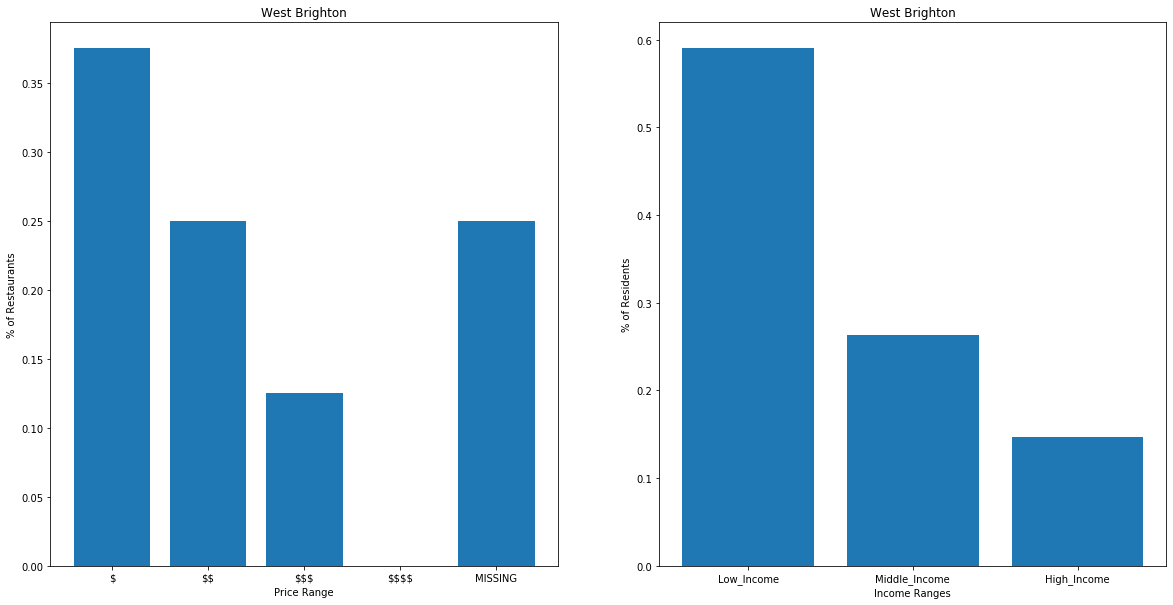

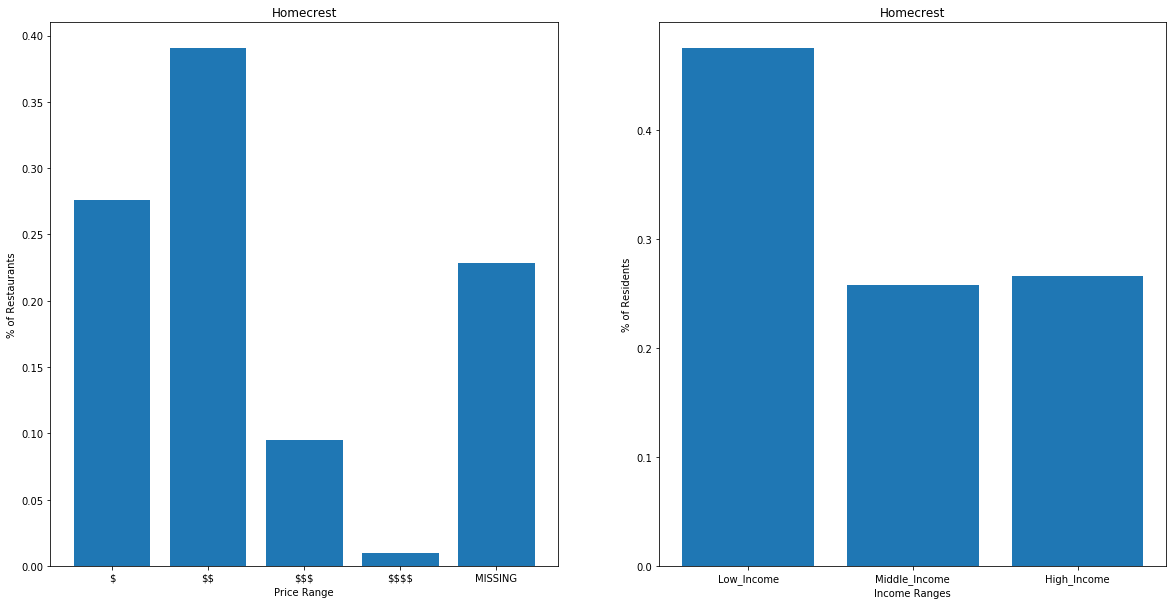

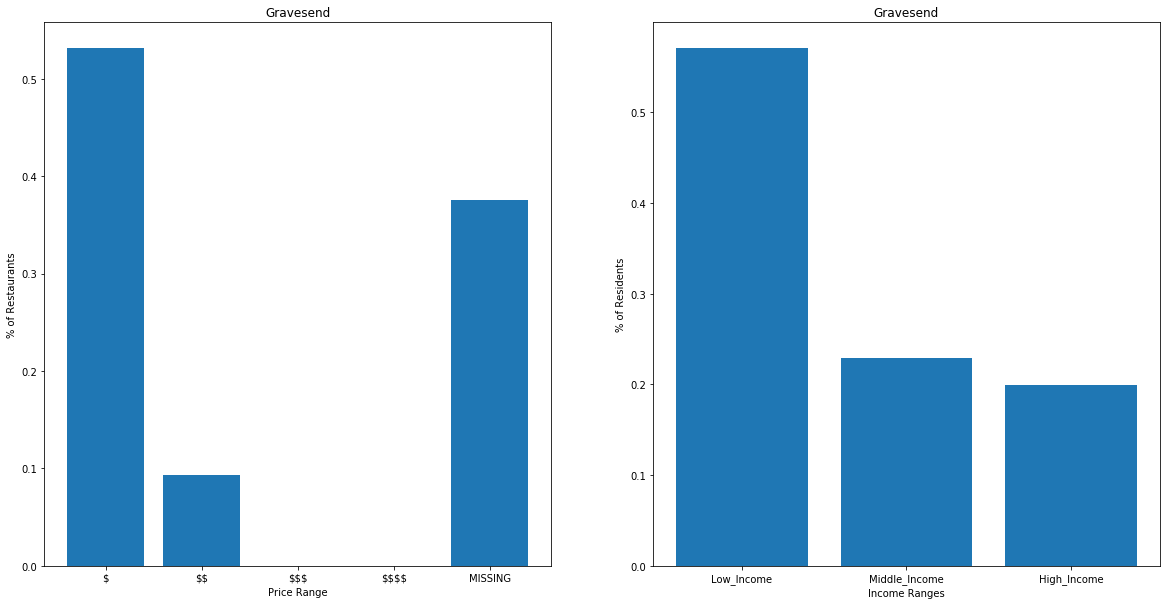

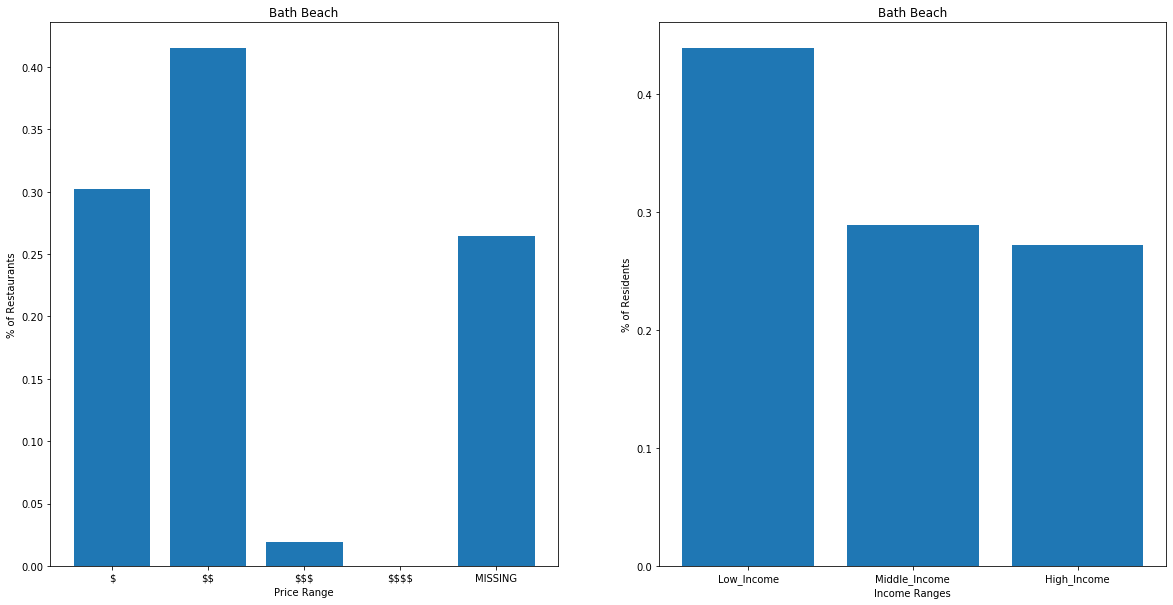

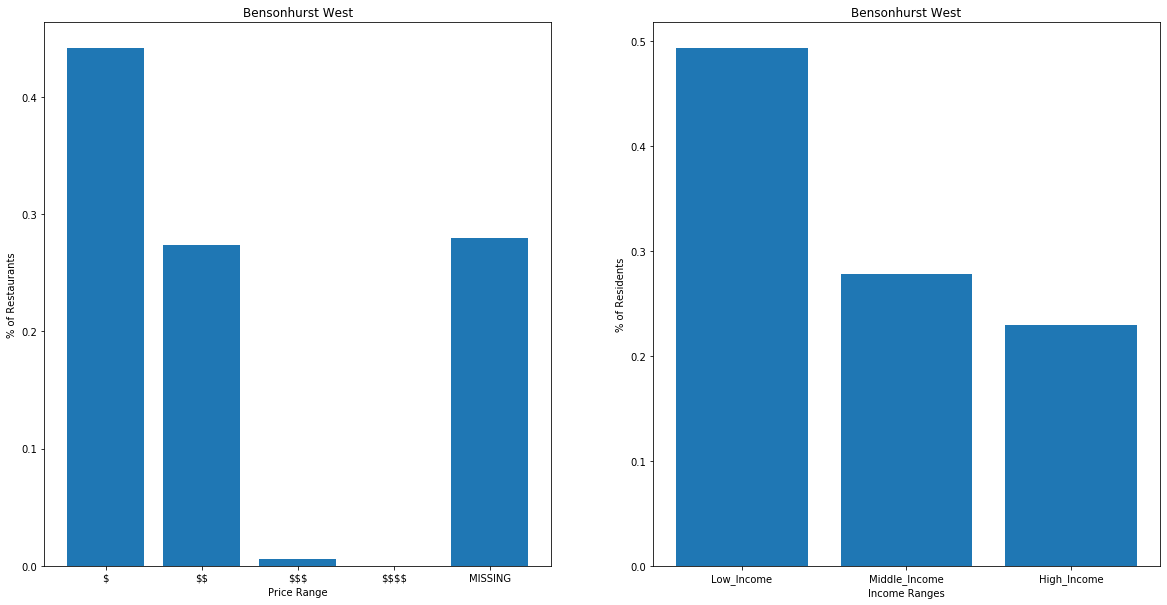

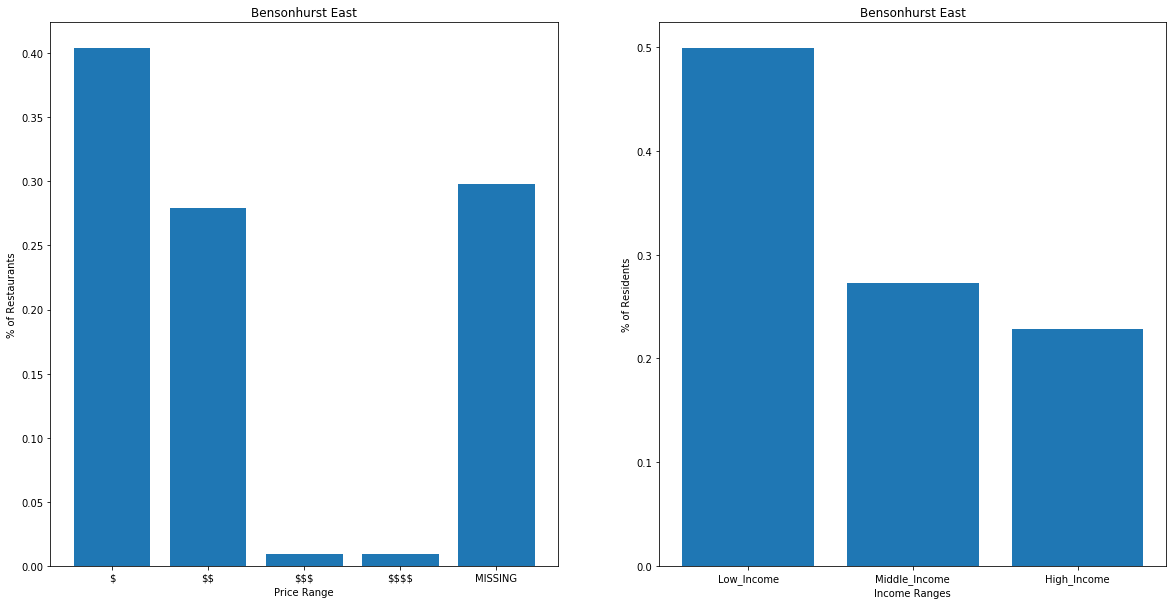

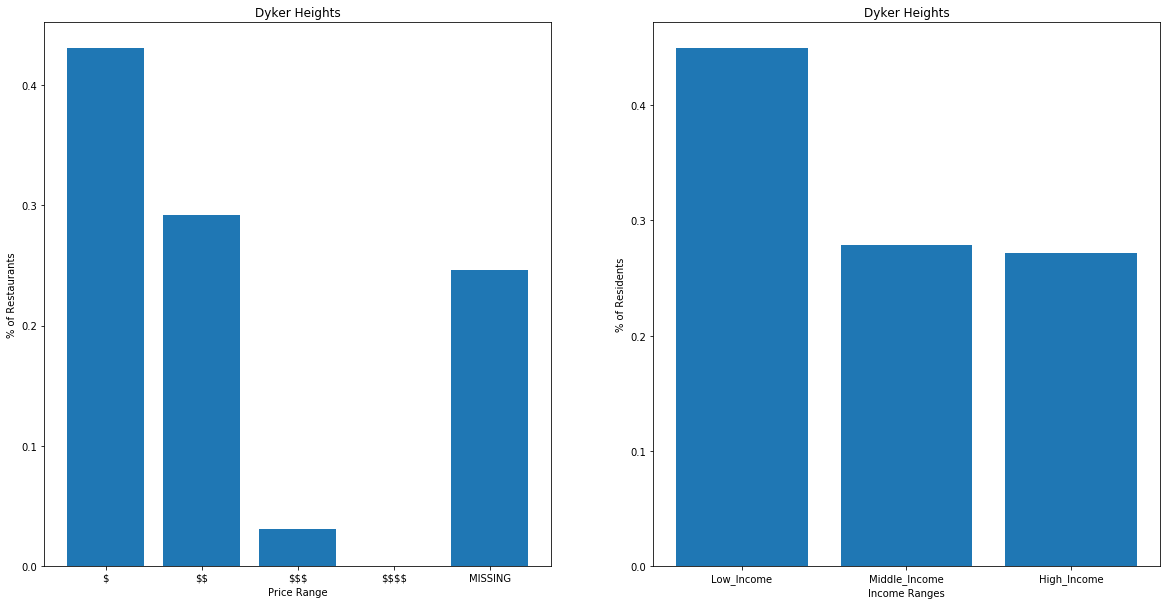

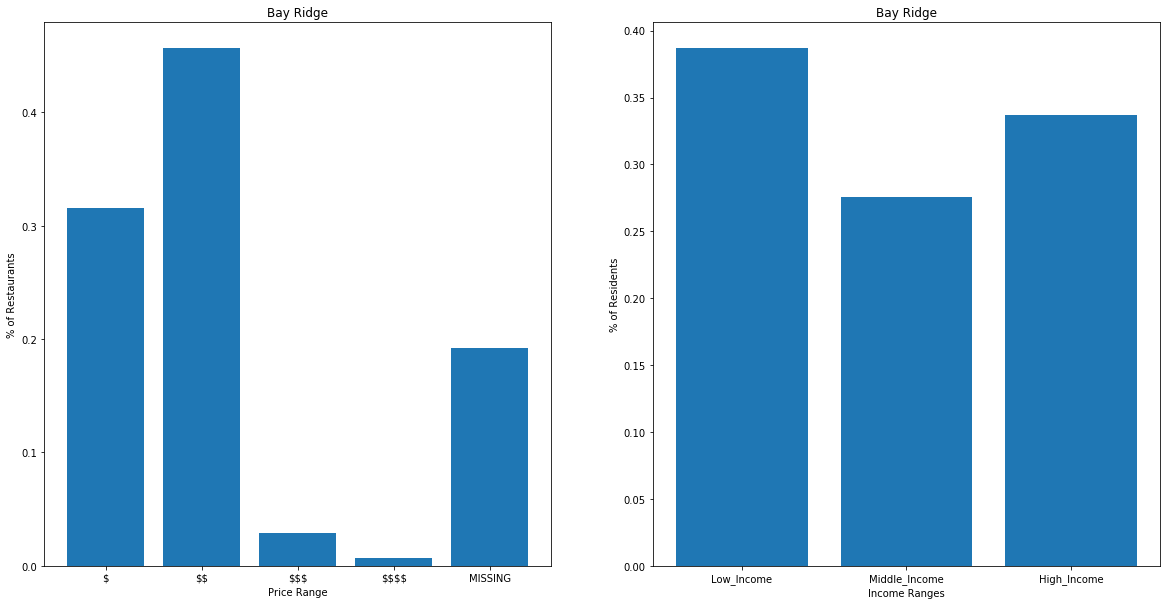

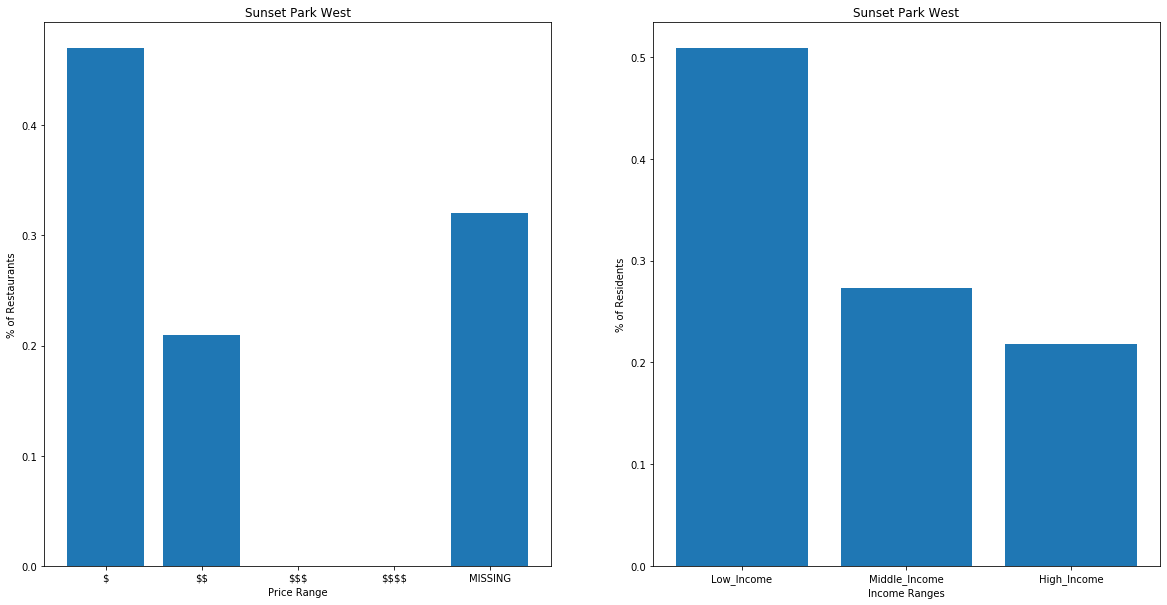

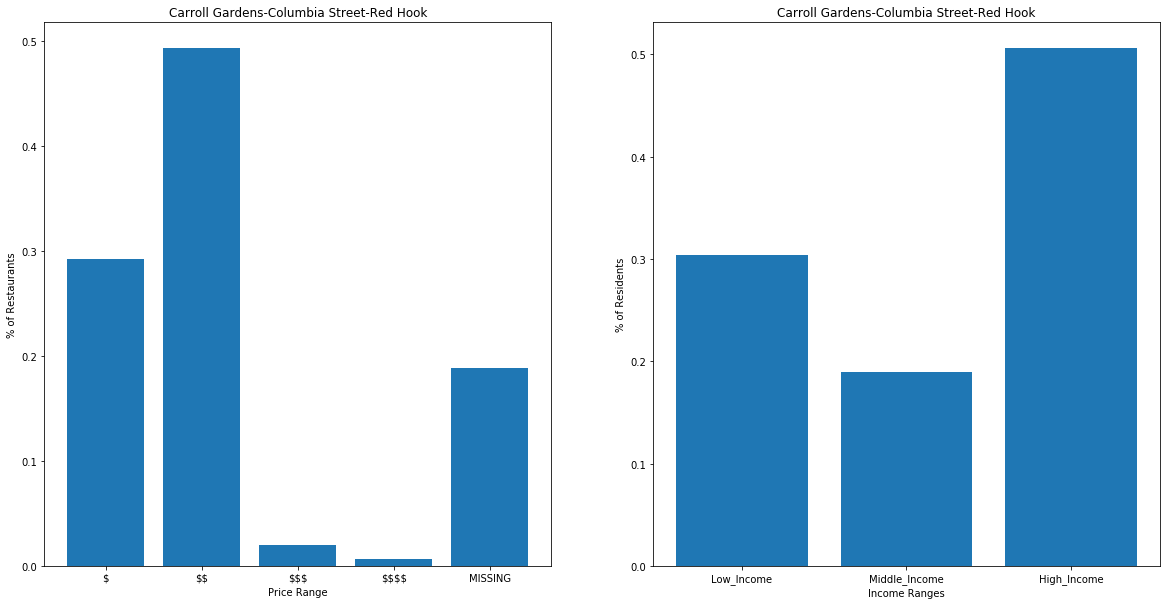

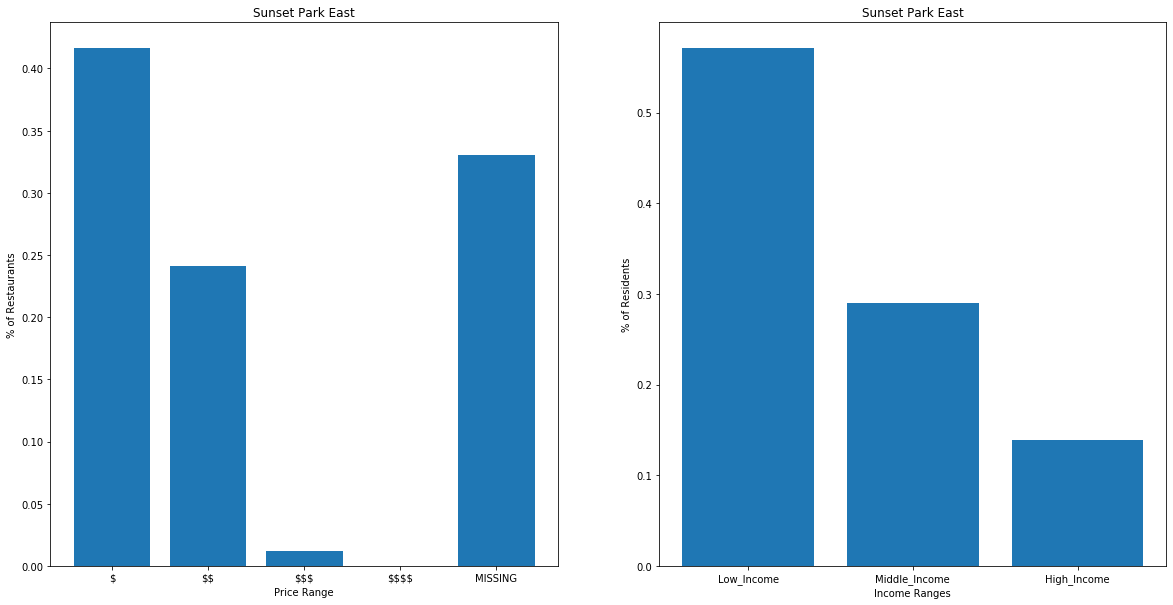

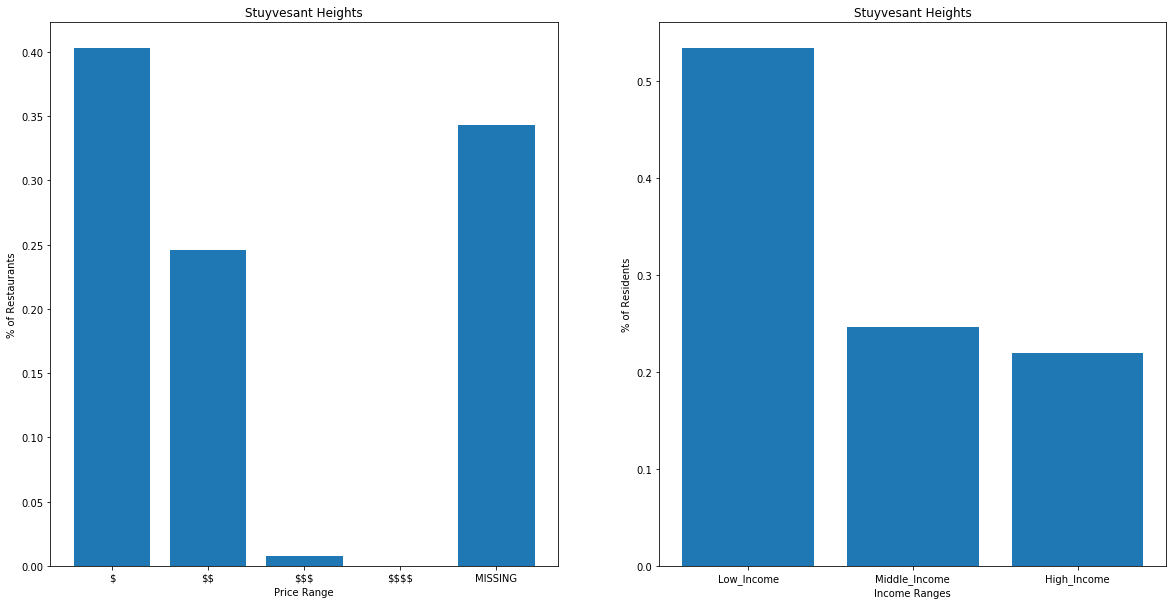

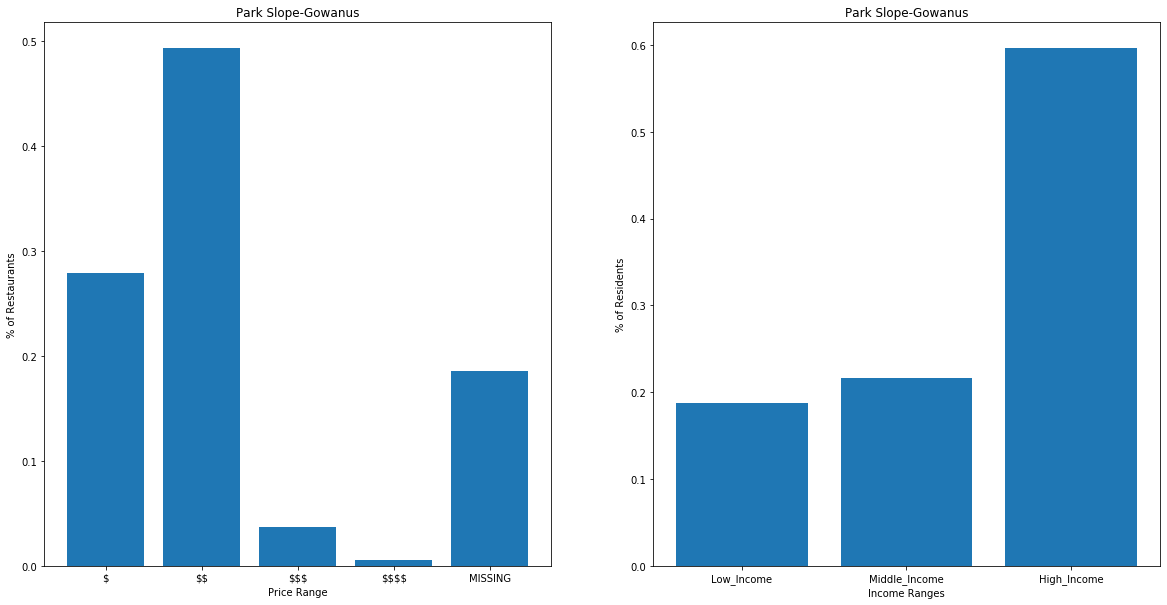

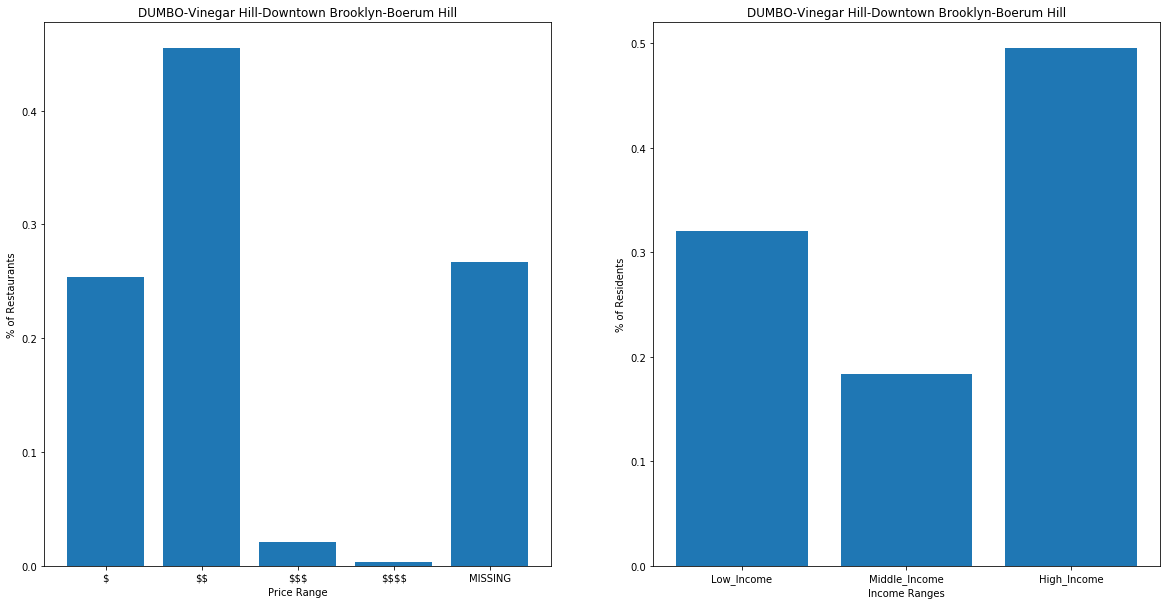

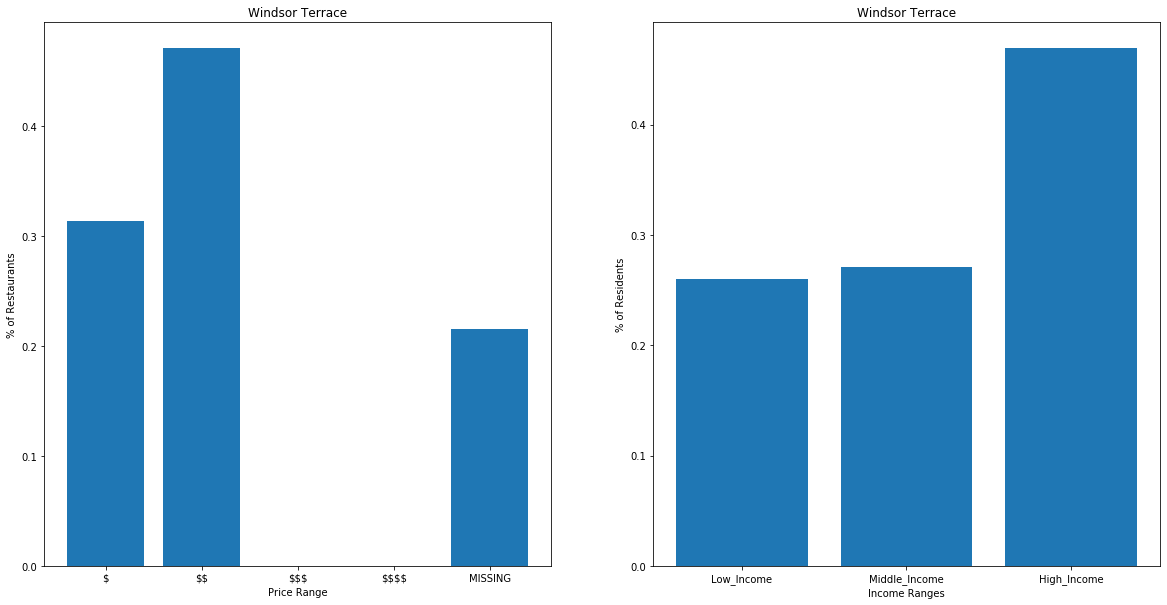

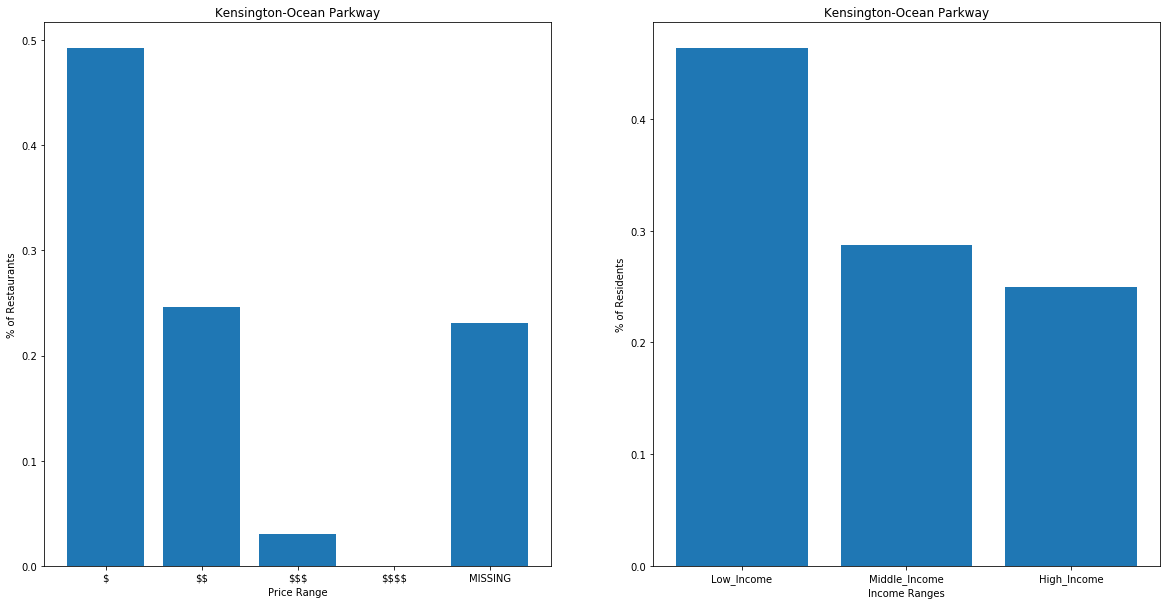

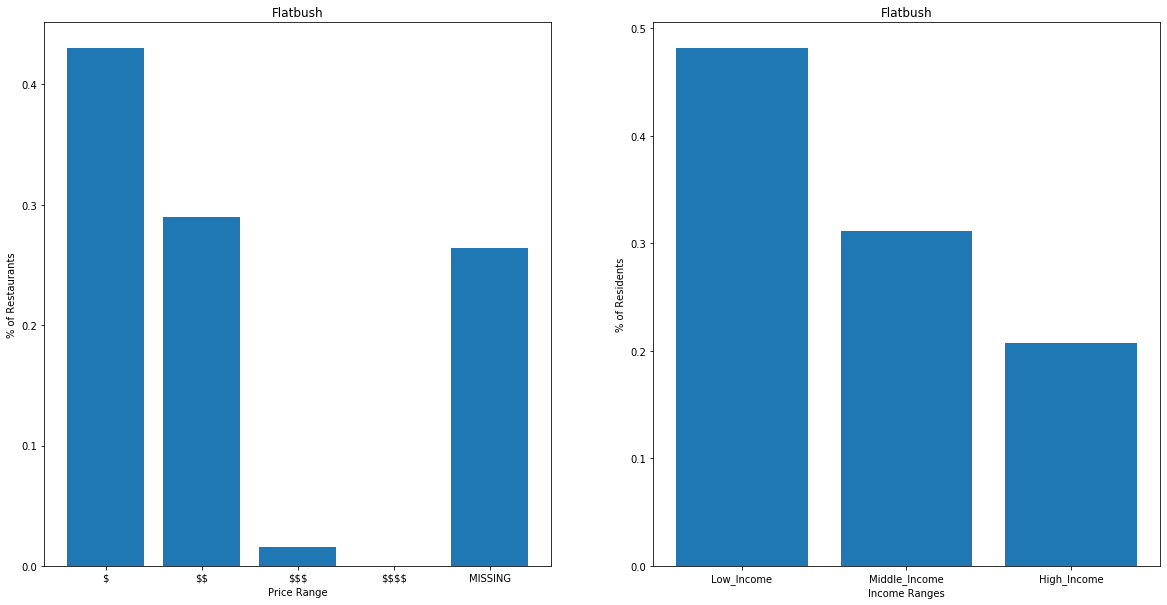

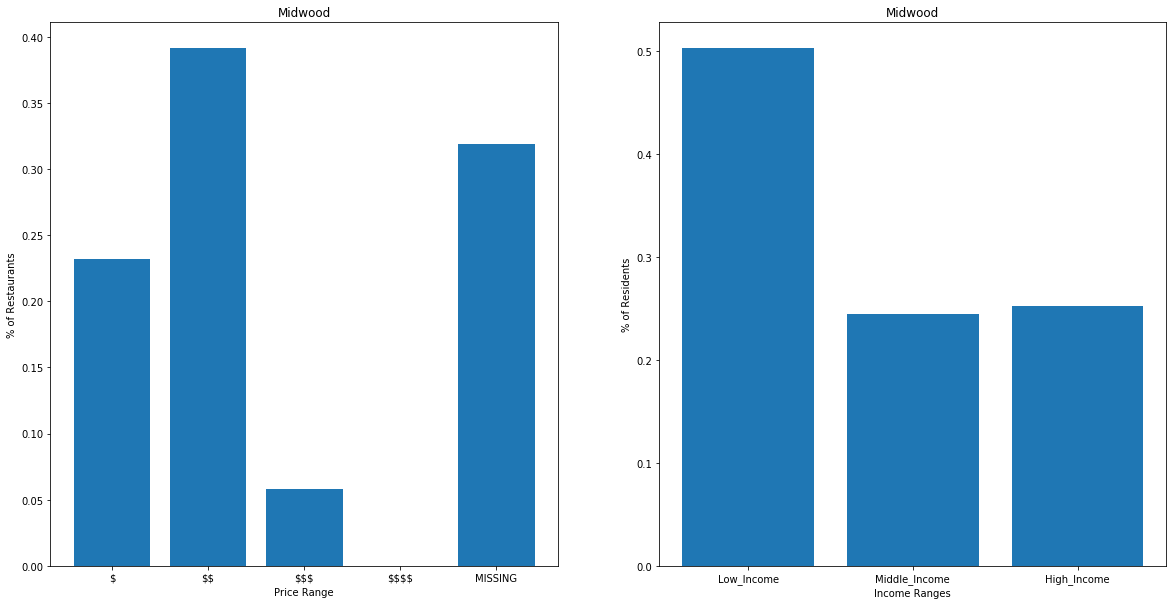

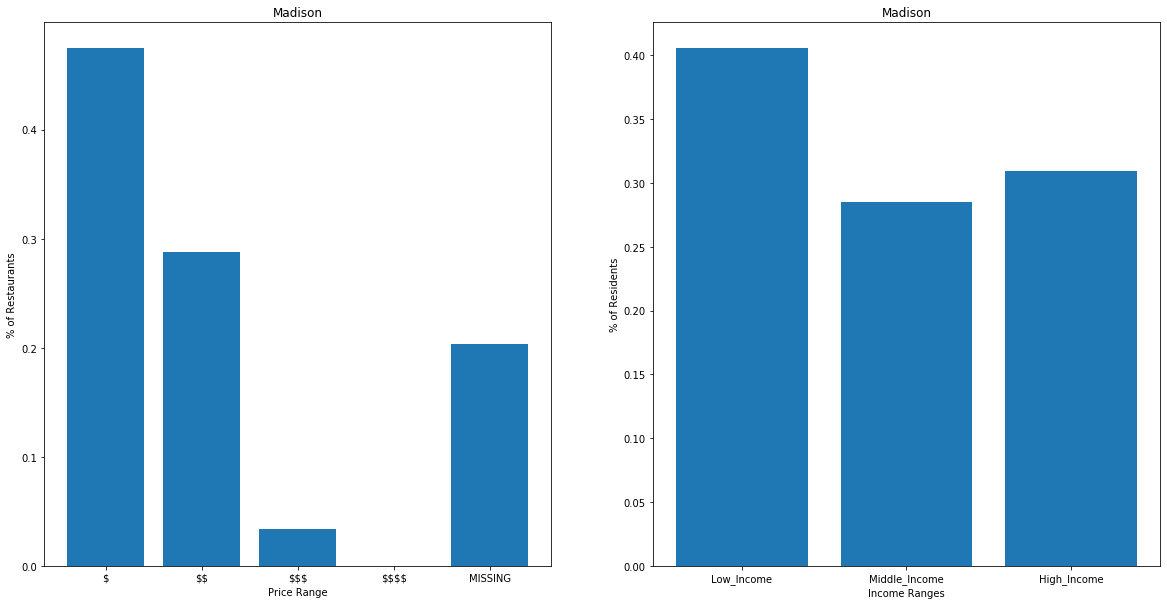

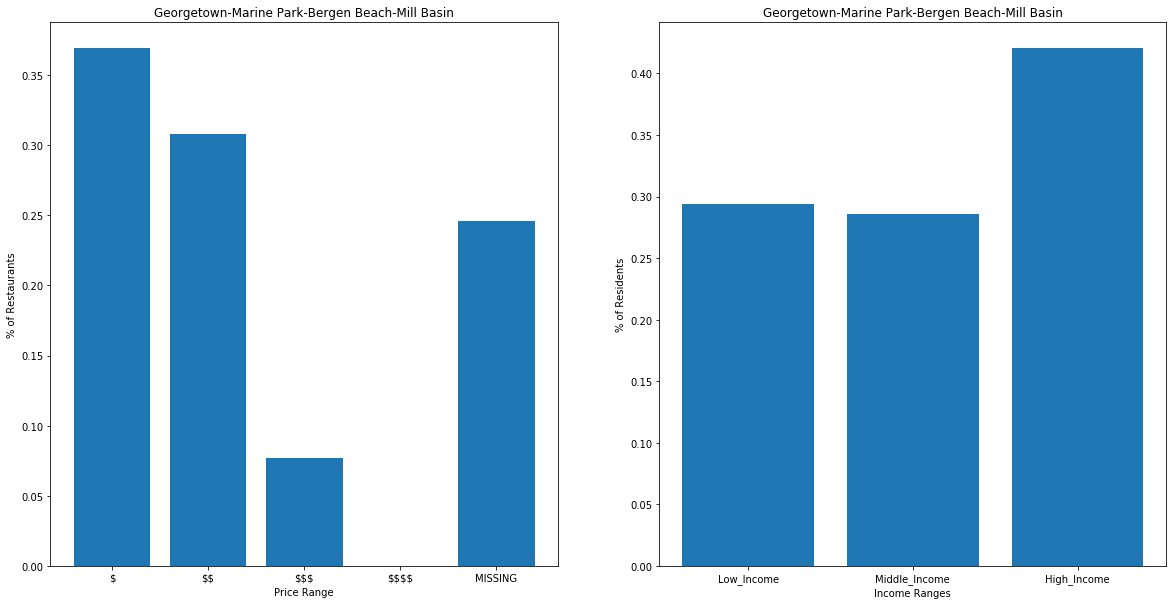

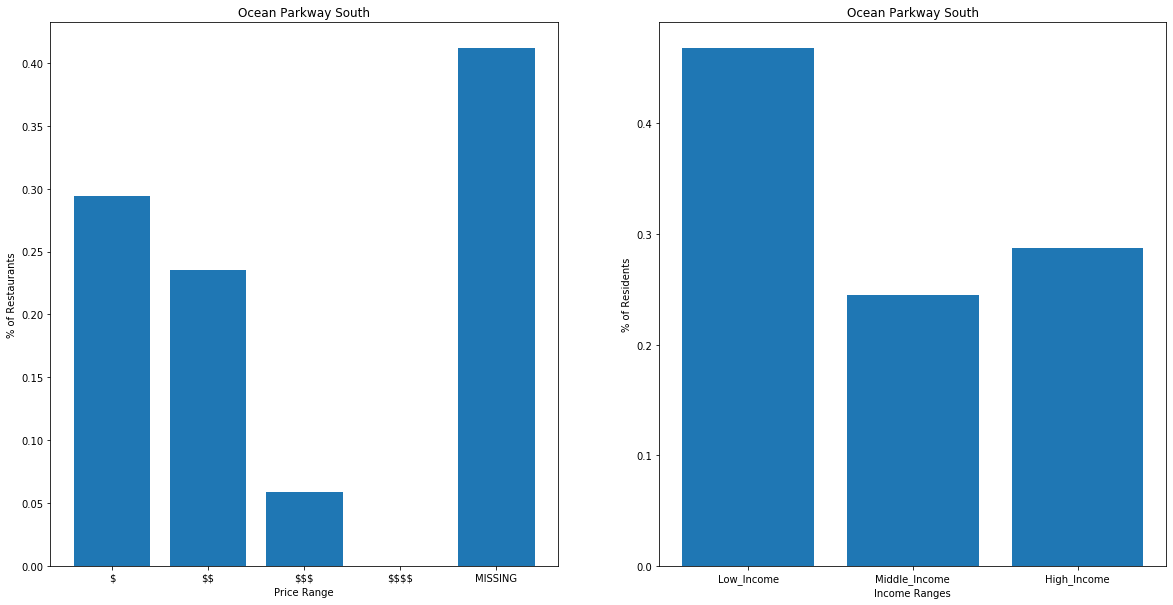

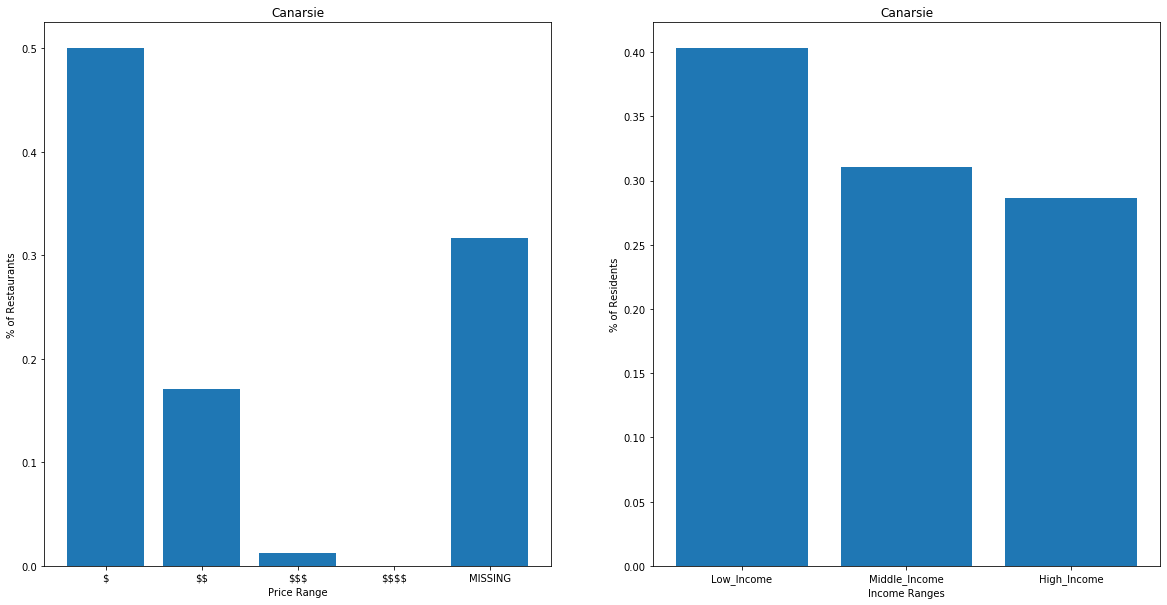

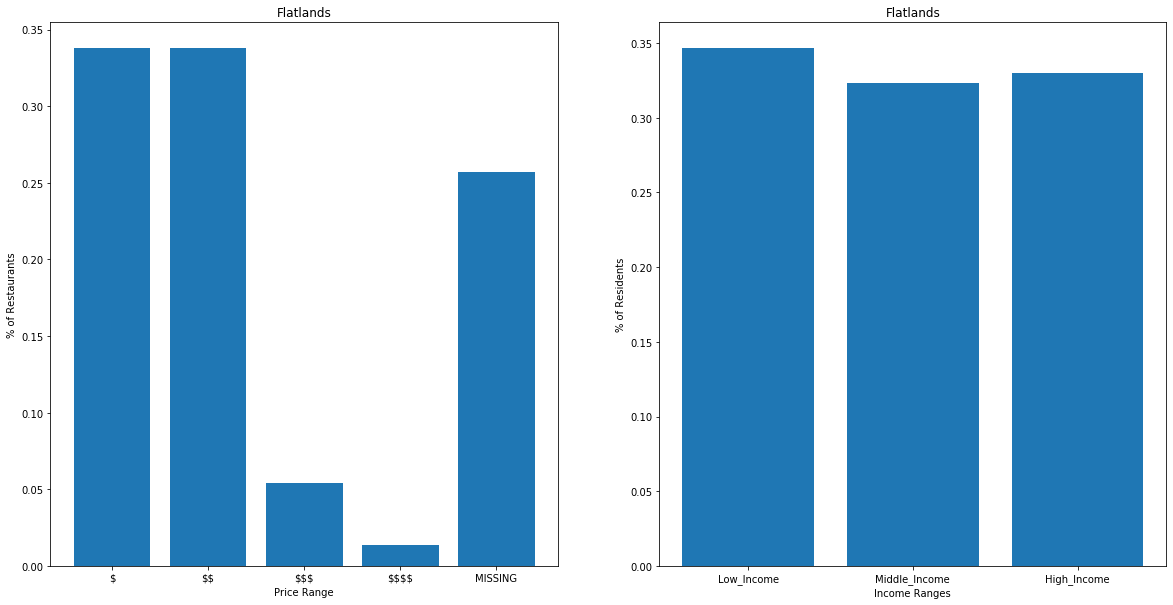

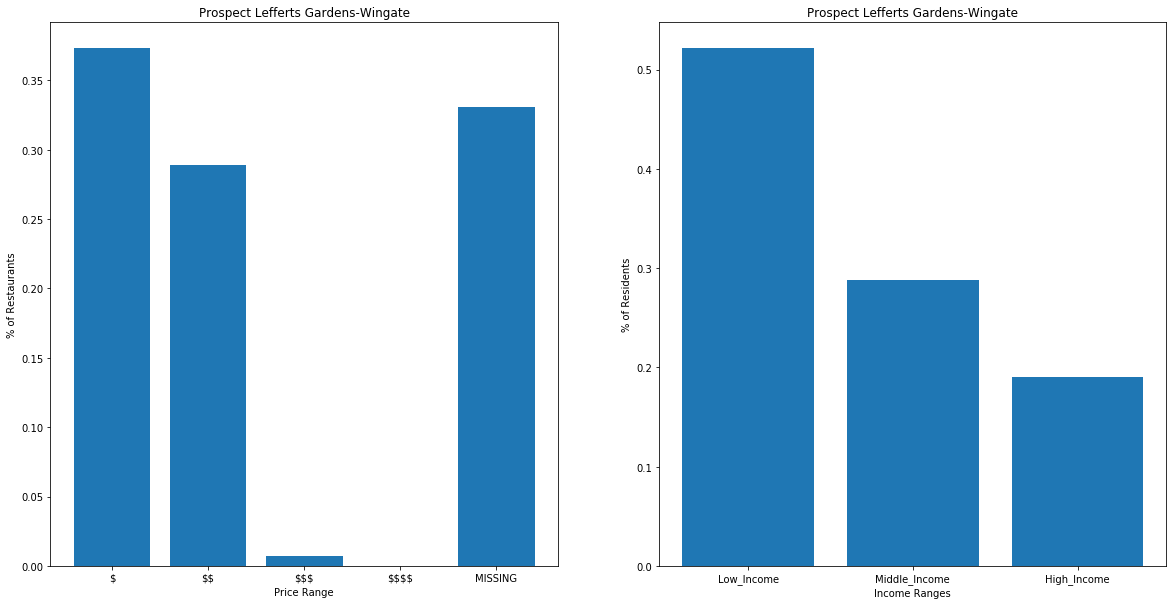

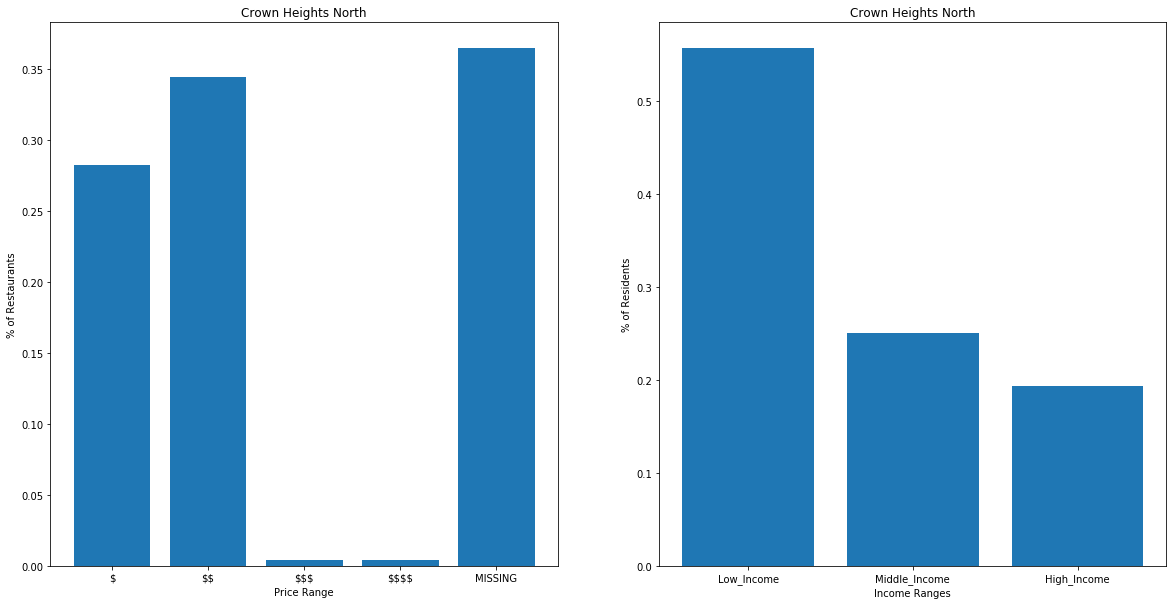

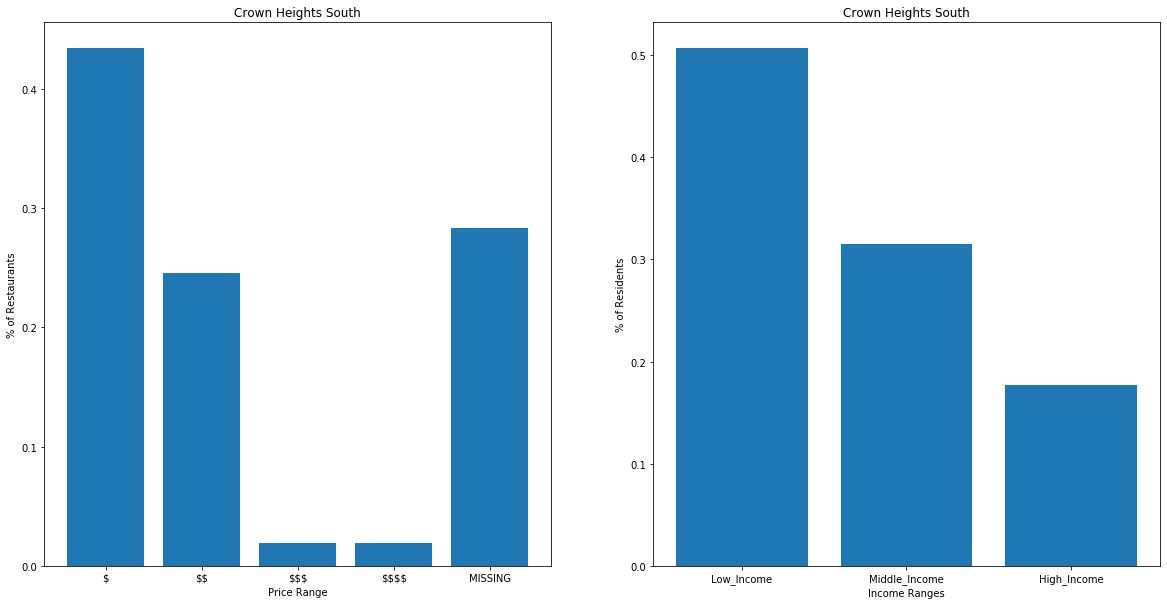

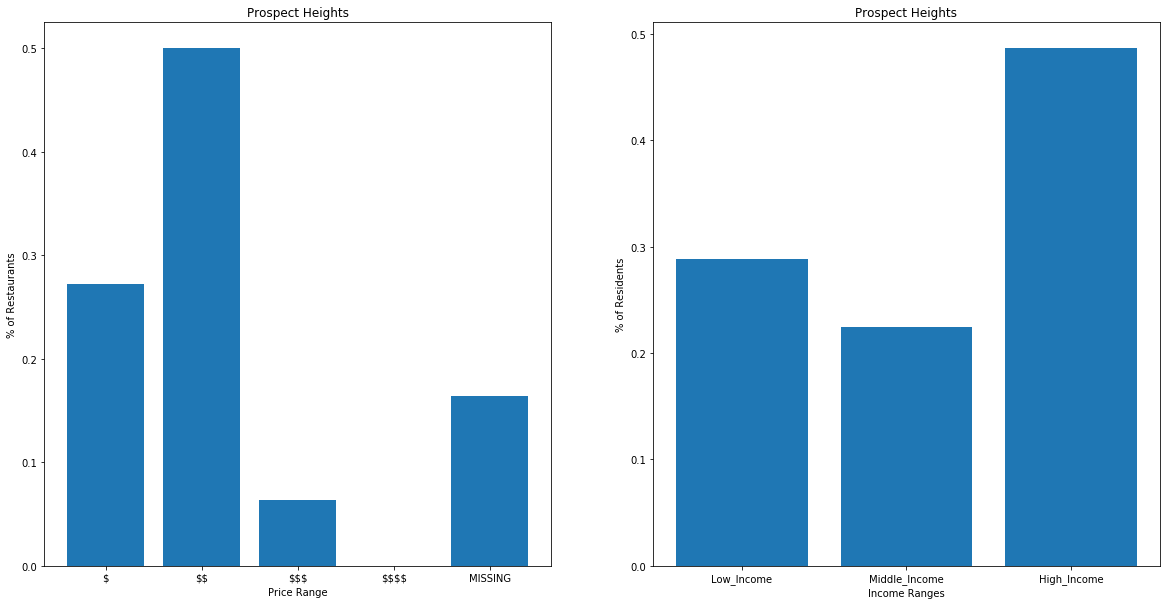

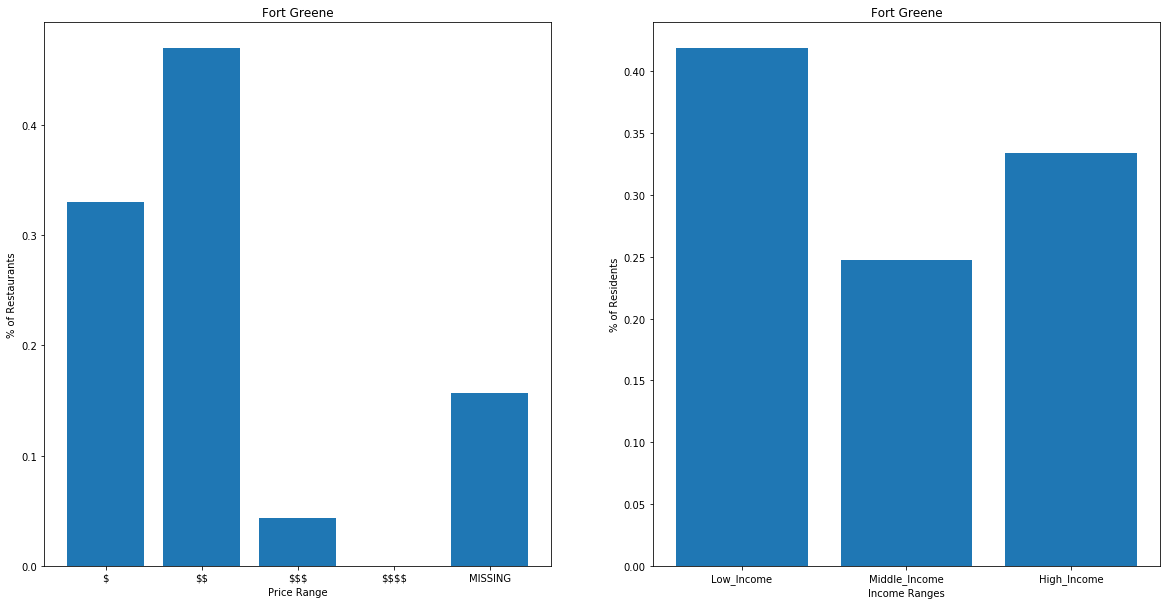

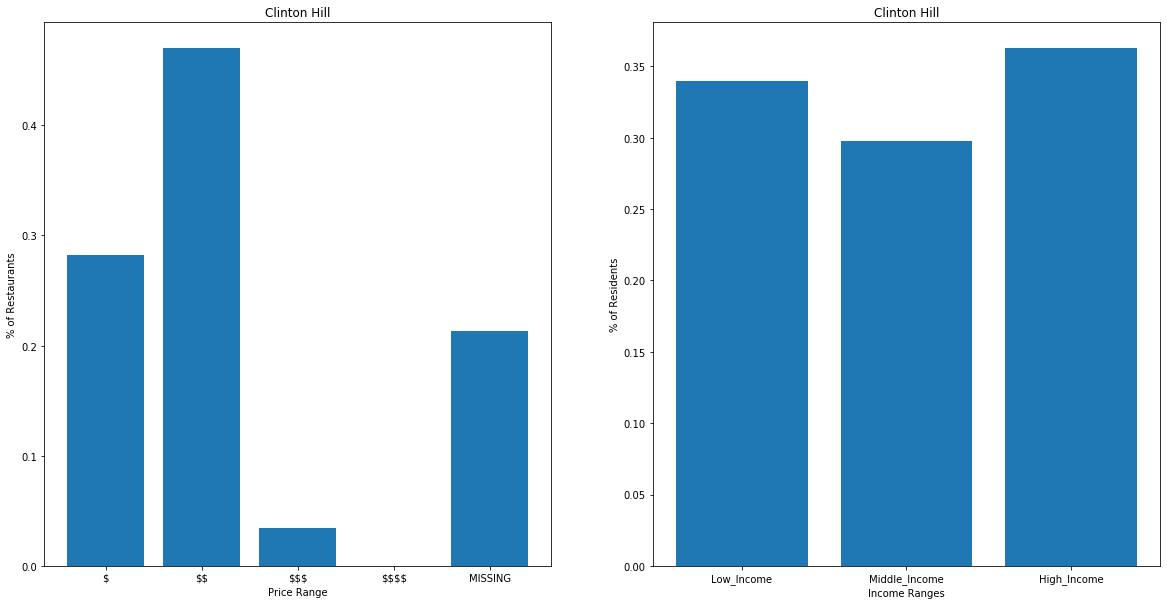

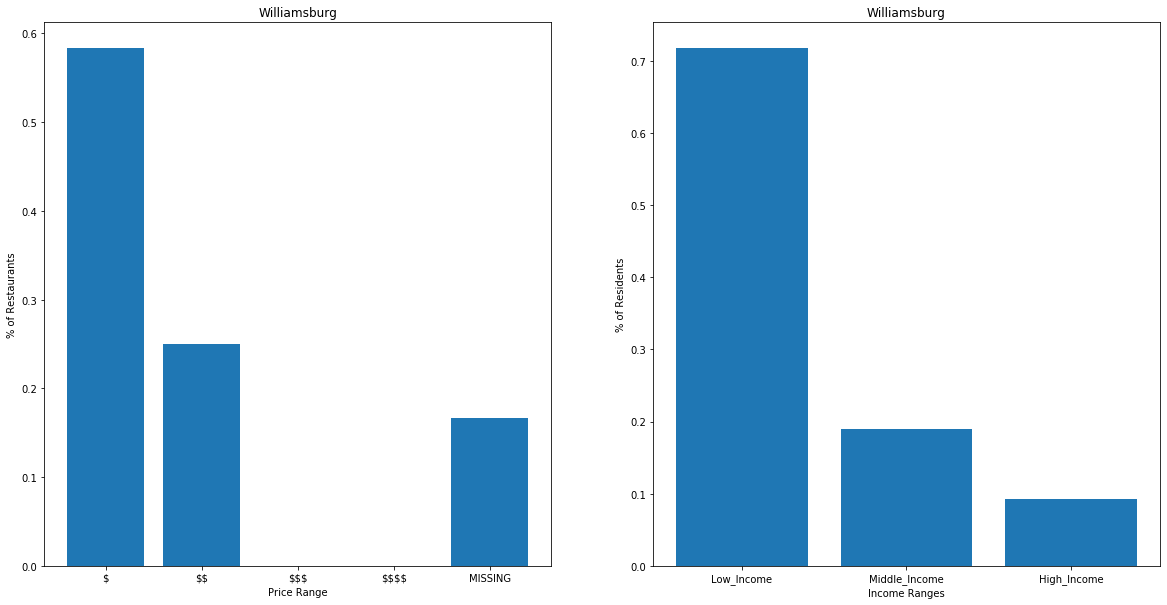

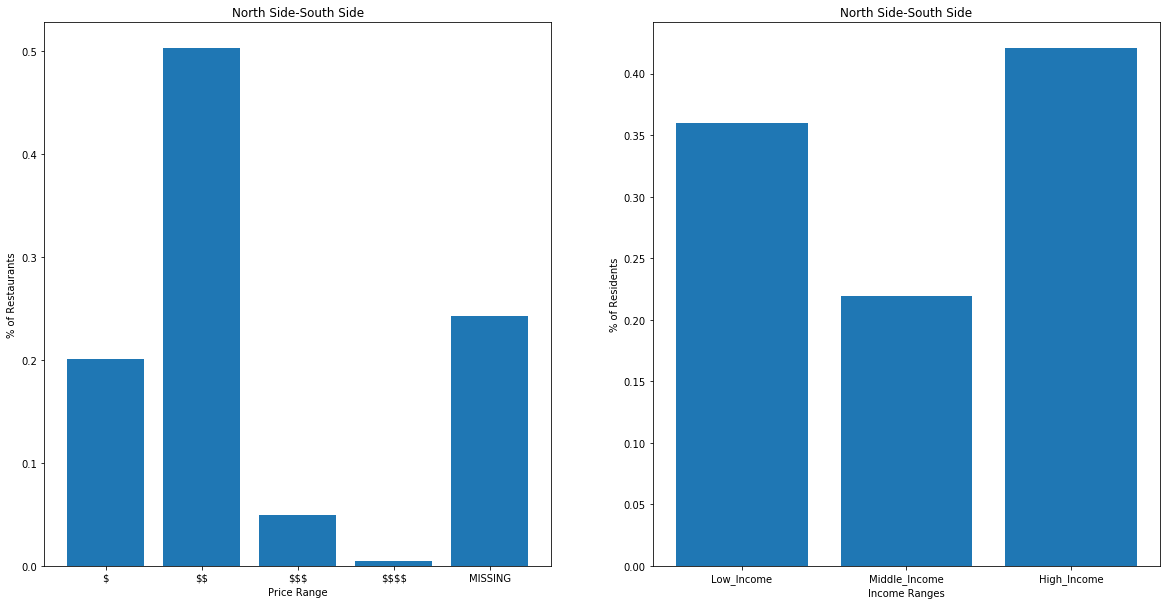

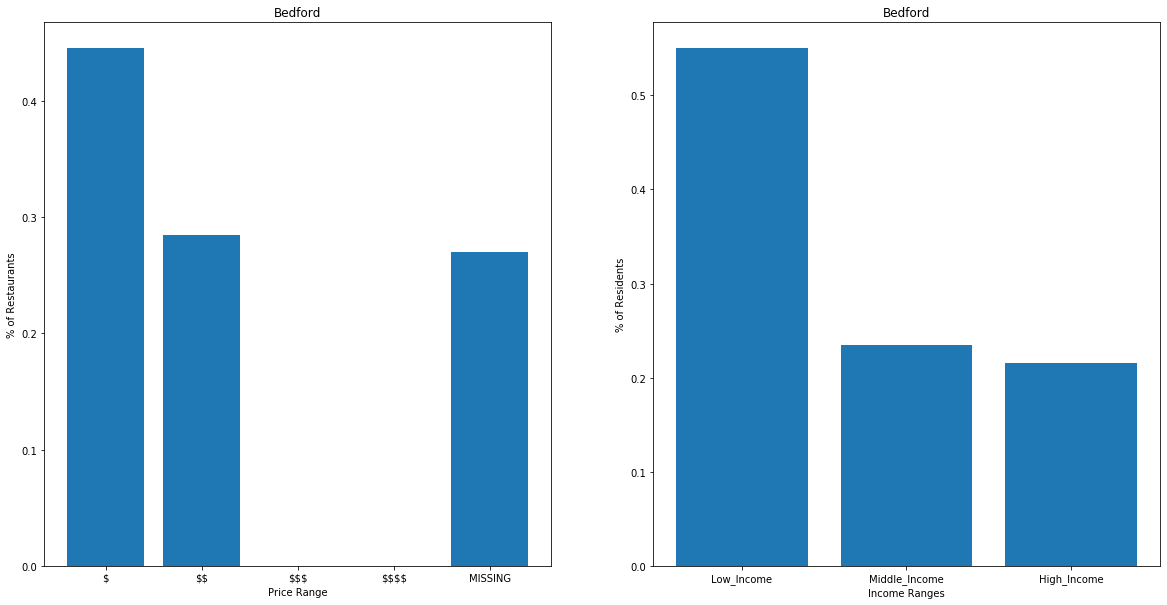

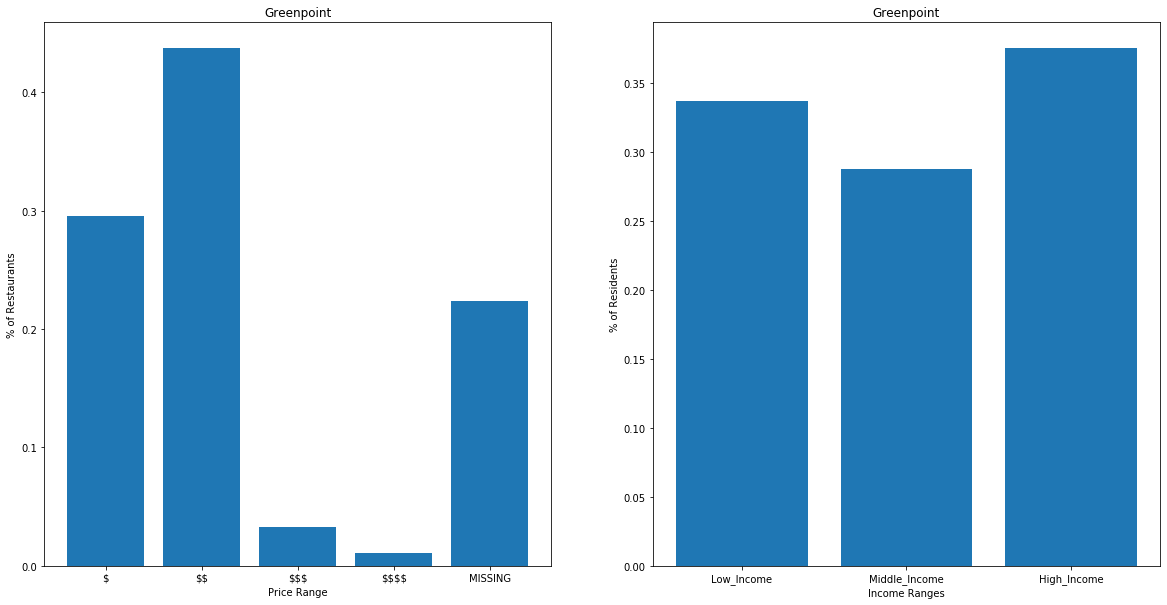

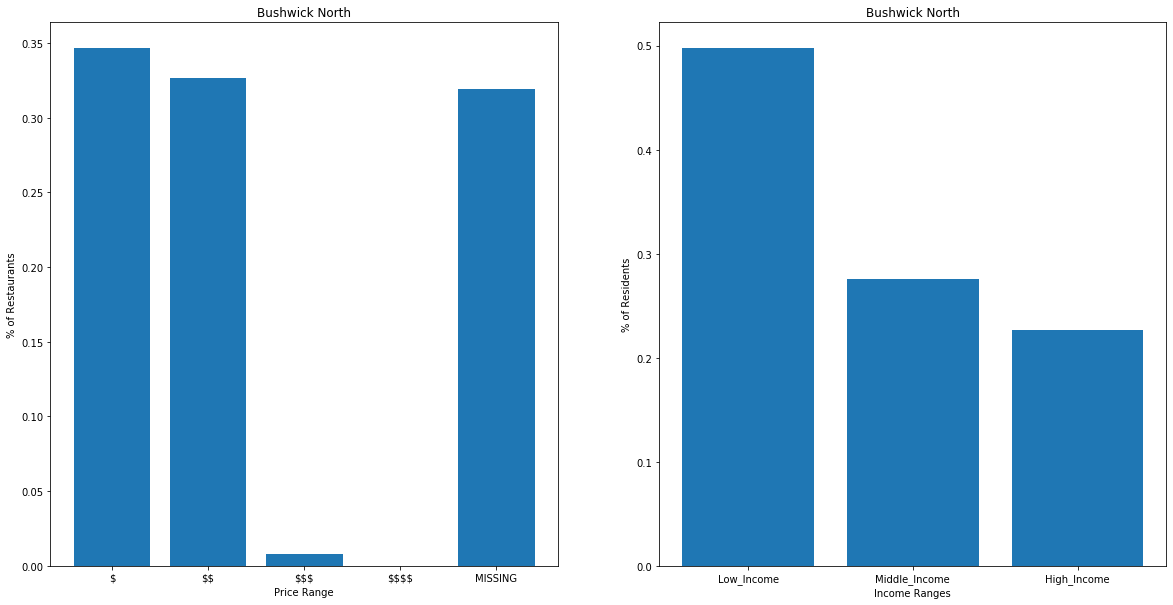

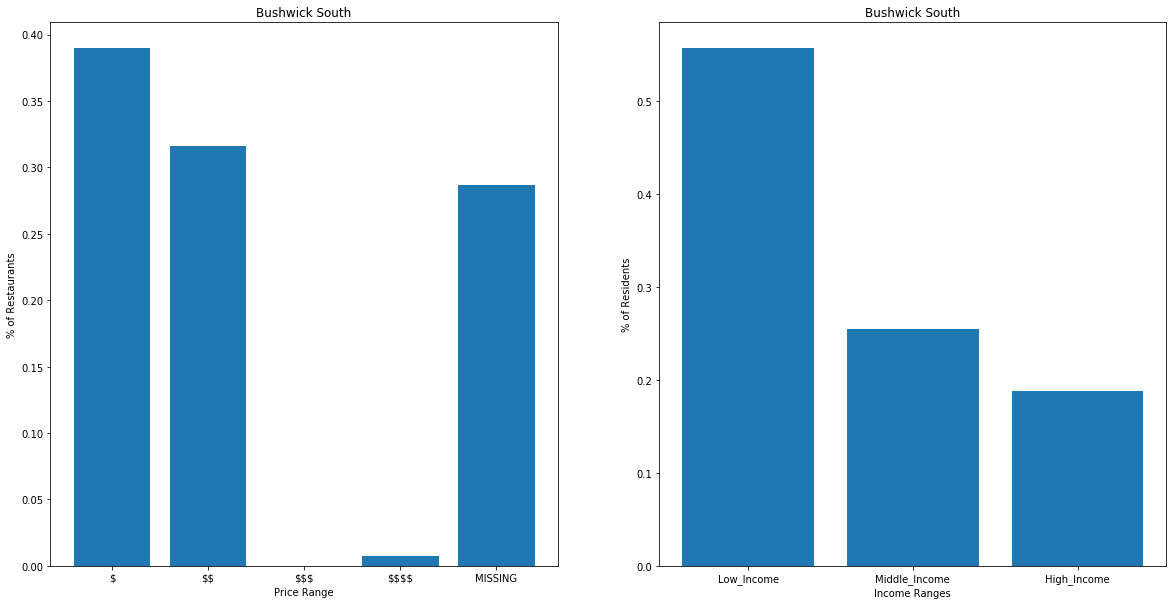

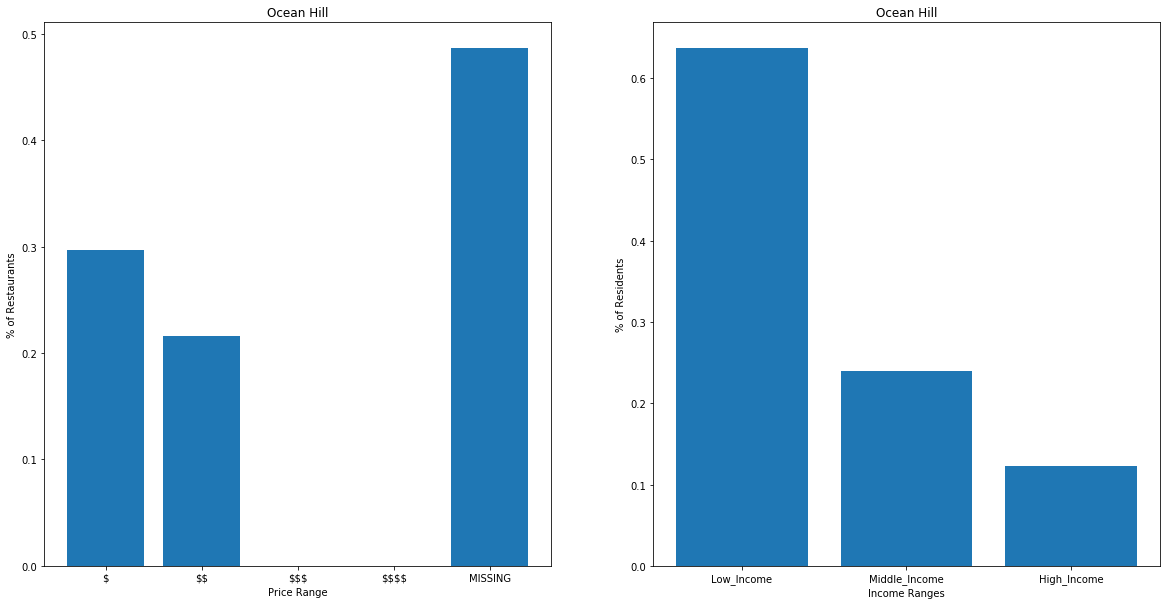

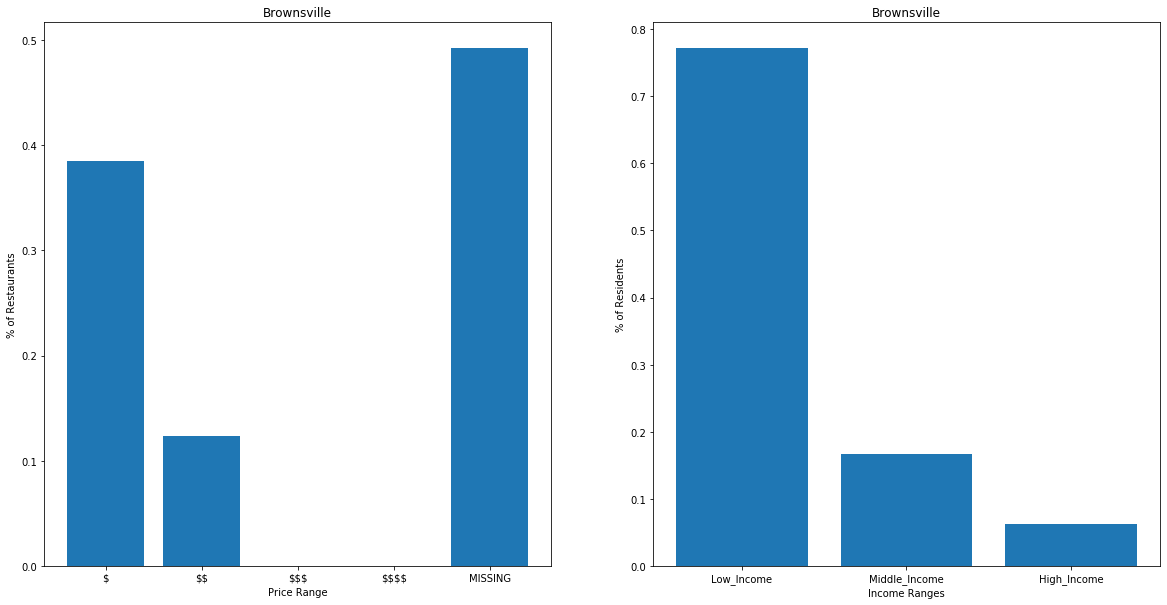

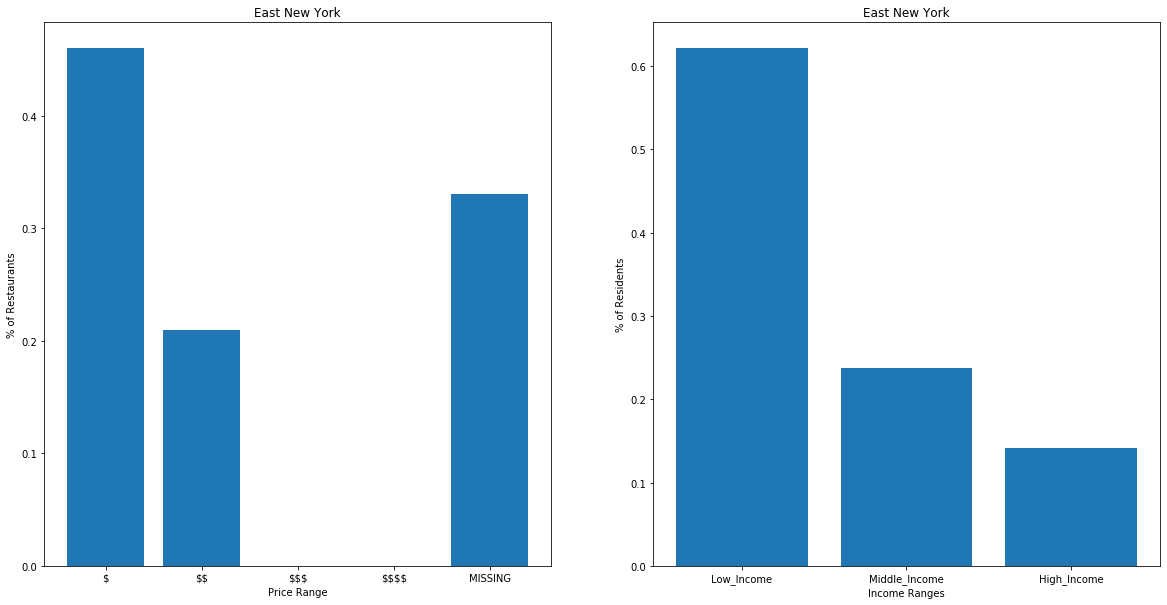

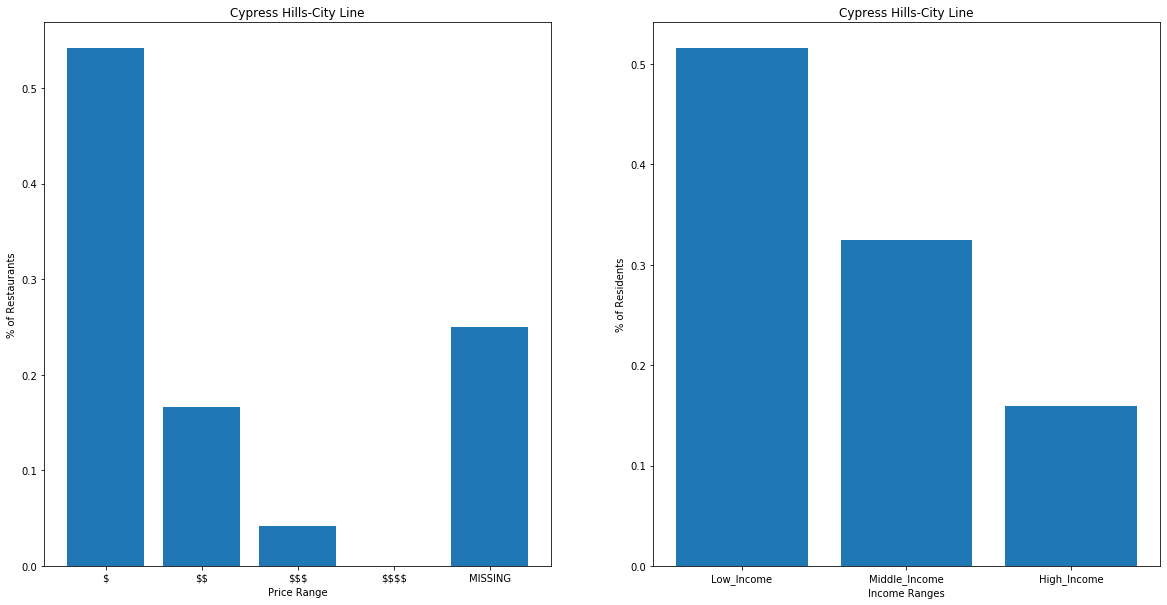

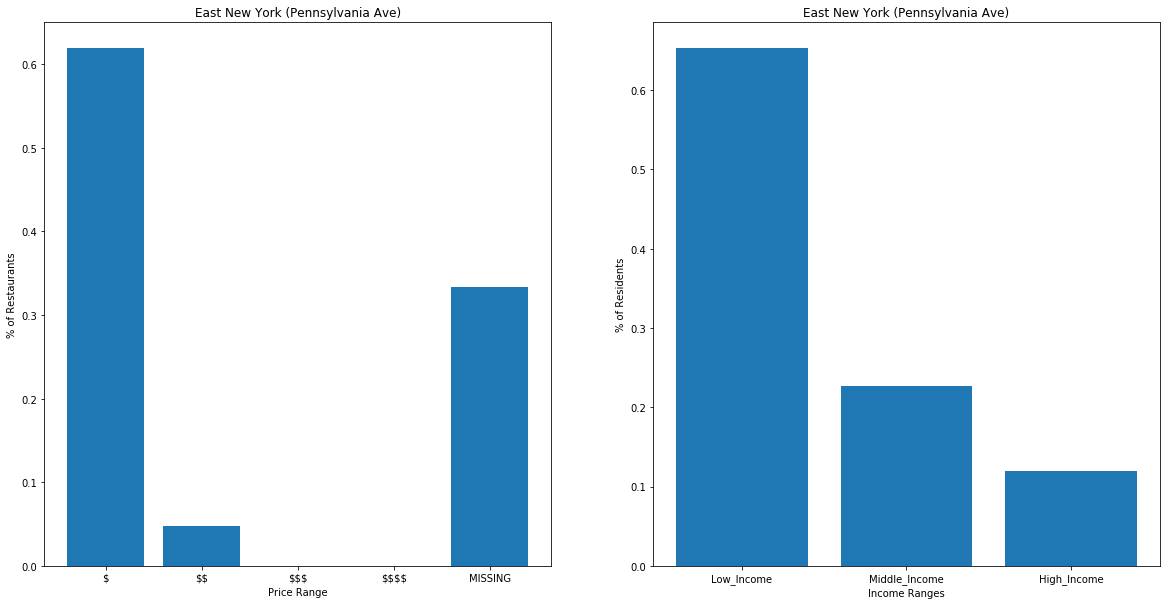

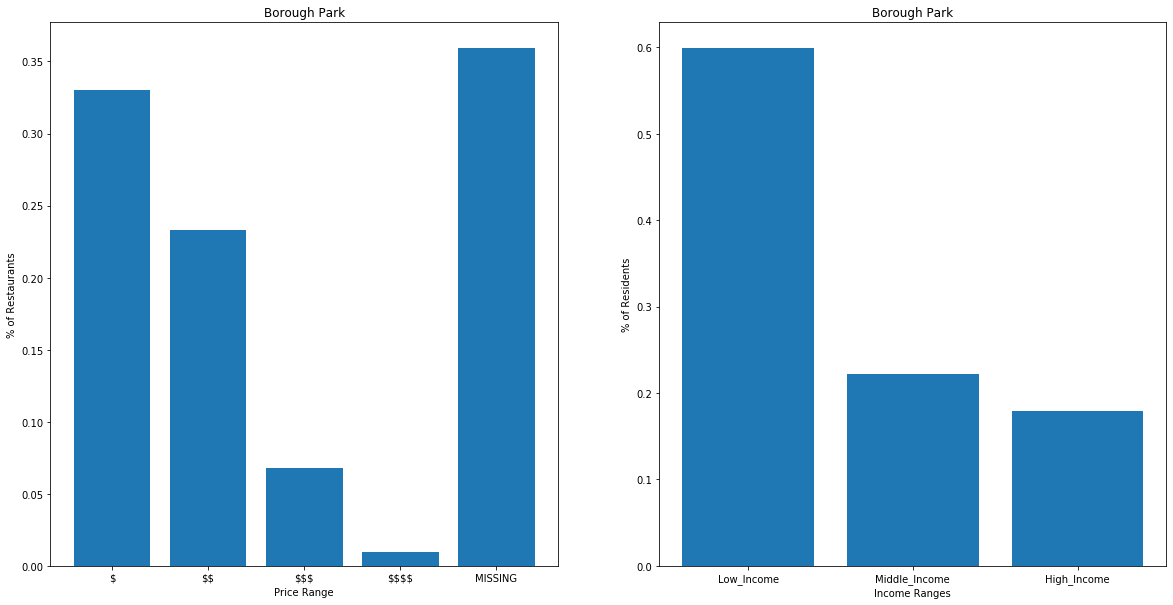

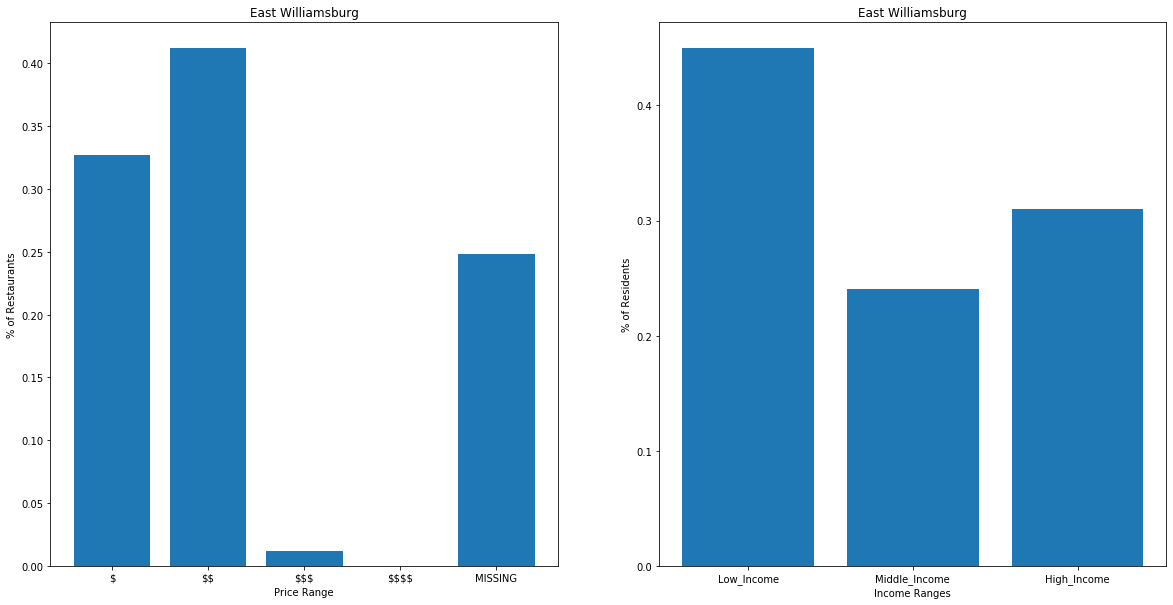

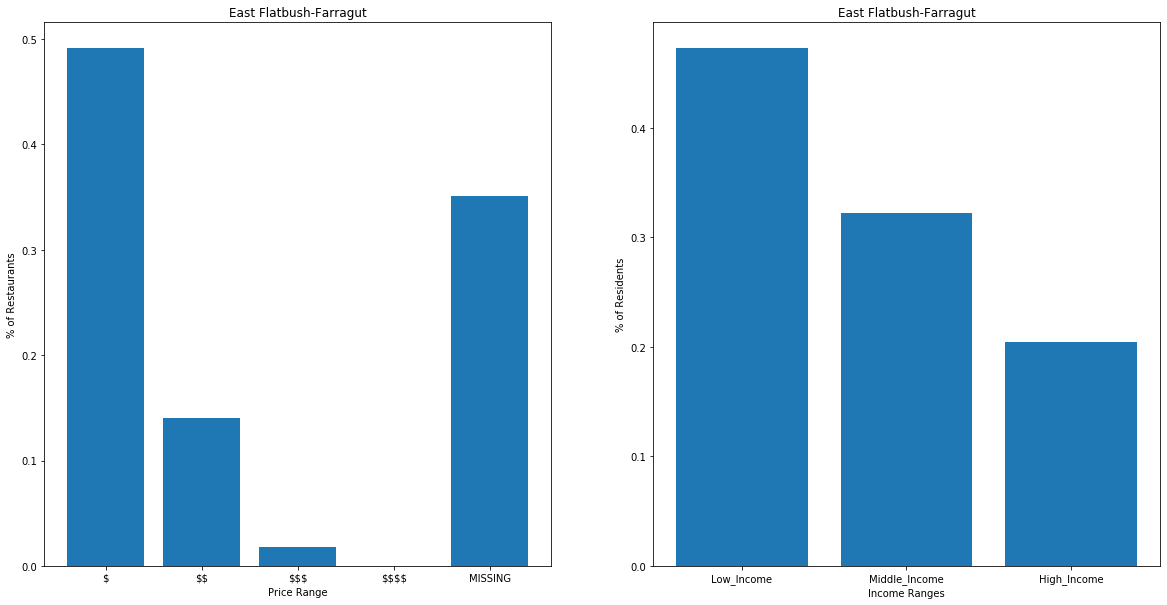

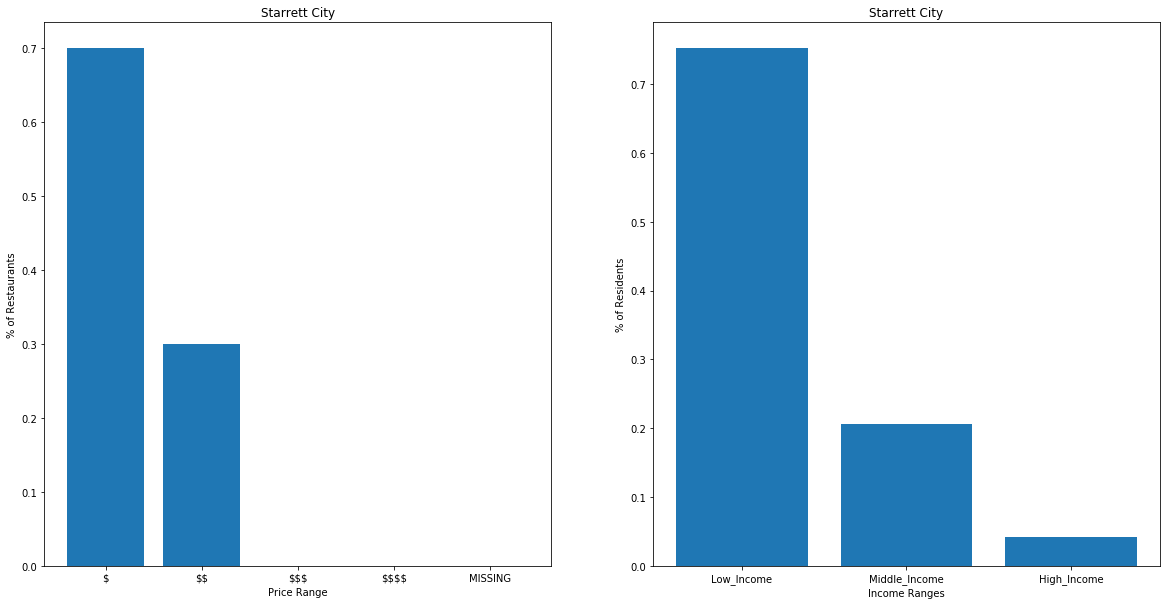

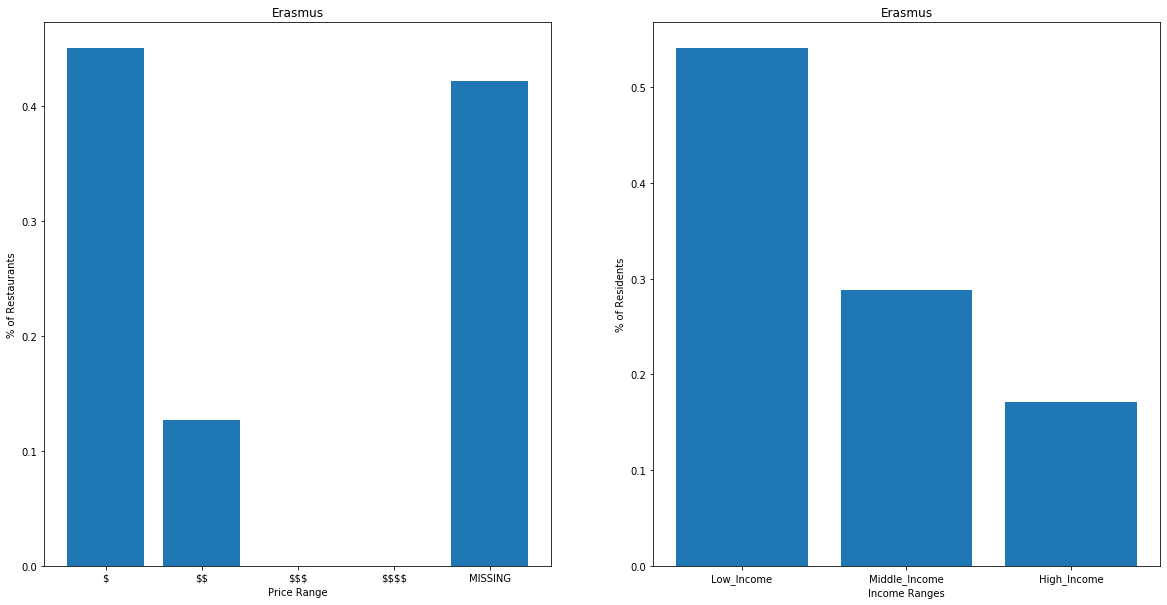

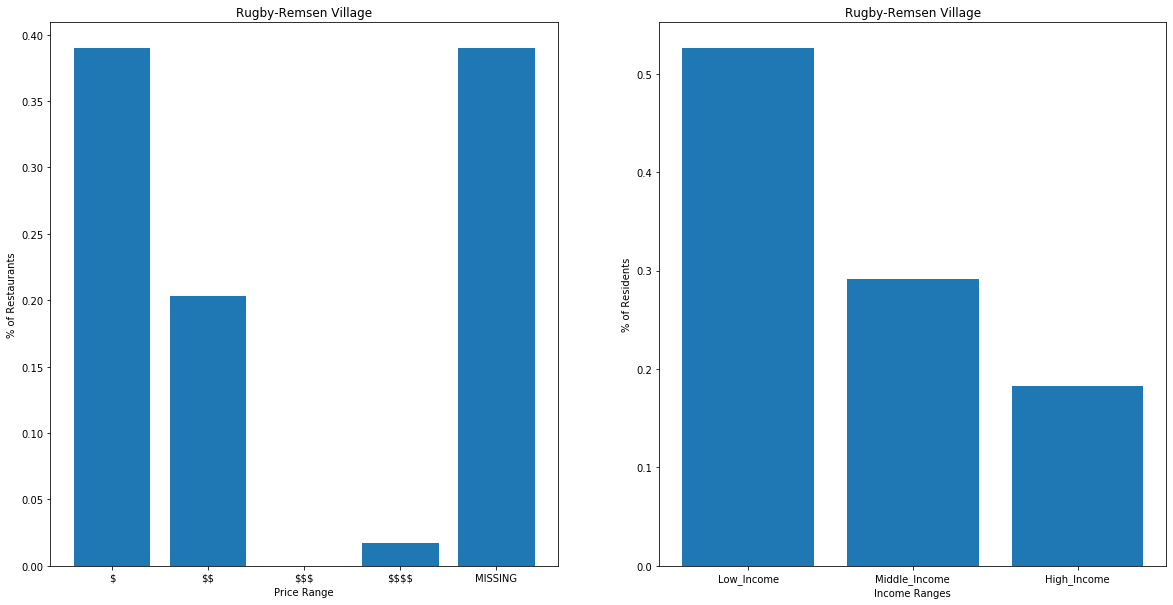

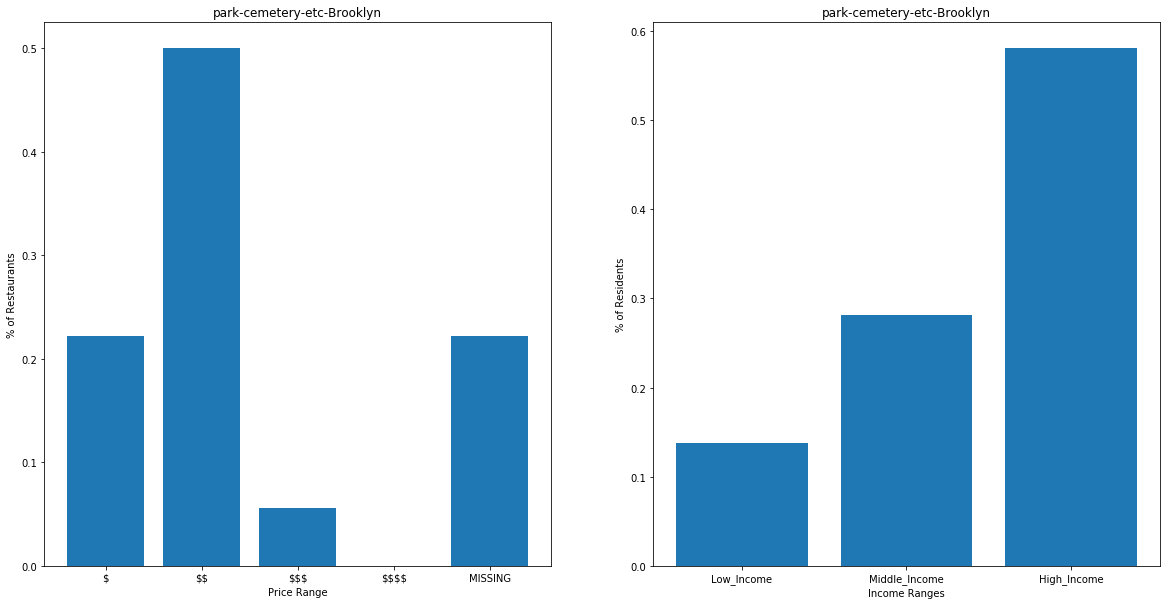

In [130]:
# FOR THE LOOP OF PLOTS

a = [1, 2, 3, 4, 5, 6, 7]
b = [1, 2, 3]
x = [1, 2, 3, 4, 5]
tick_label_1 = ["$", "\$\$", "\$\$\$", "\$\$\$\$", 'MISSING']
tick_label_2 = ['0-25','25-50','50-75','75-100','100-125','125-150','>150']
tick_label_3 = ['Low_Income','Middle_Income','High_Income']


for i in range(len(bklyn.index)):
    fig, ax = plt.subplots(figsize=(20, 10))
    
    y = bklyn.iloc[i]['price_1':'MISSING']
    plt.subplot(1,2,1)
    plt.bar(x,y, tick_label = tick_label_1)
    plt.title(bklyn.iloc[i]['NTAName'])
    plt.xlabel('Price Range')
    plt.ylabel('% of Restaurants')


#    b = bklyn10.iloc[i]['pct_0-25k':'pct_> 150k']
#    plt.subplot(1,2,2)
#    plt.bar(a,b, tick_label = tick_label_2)
#    plt.title(bklyn10.iloc[i]['NTAName'])
#    plt.xlabel('Income Range (in $1000s)')
#    plt.ylabel('Percentage of Residents')

    
    z = bklyn.iloc[i]['Low_Income':'High_Income']
    plt.subplot(1,2,2)
    plt.bar(b,z, tick_label = tick_label_3)
    plt.title(bklyn.iloc[i]['NTAName'])
    plt.xlabel('Income Ranges')
    plt.ylabel('% of Residents')
    plt.show()

In [133]:
bklyn.head()

,Unnamed: 0,NTACode,price_1,price_2,price_3,price_4,MISSING,NTAName,Households,pct_0-25k,...,num_25k-50k,num_50k-75k,num_75k-100k,num_100k-125k,num_125k-150k,num_> 150k,density,Low_Income,Middle_Income,High_Income
0,0,BK09,0.298969,0.474227,0.061856,0.000000,0.164948,Brooklyn Heights-Cobble Hill,11115,0.115070,...,1201.0,777.0,1231.0,1042.0,840.0,4745.0,0.000090,0.223122,0.180657,0.596221
1,1,BK17,0.286885,0.442623,0.081967,0.016393,0.172131,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,26150,0.253805,...,5298.0,3965.0,2832.0,2384.0,1692.0,3342.0,0.000038,0.456405,0.259924,0.283671
2,2,BK19,0.379310,0.293103,0.068966,0.017241,0.241379,Brighton Beach,14557,0.395823,...,2697.0,2311.0,990.0,681.0,521.0,1595.0,0.000069,0.581095,0.226764,0.192141
3,3,BK21,0.480000,0.240000,0.000000,0.000000,0.280000,Seagate-Coney Island,11236,0.478907,...,2285.0,1447.0,711.0,642.0,240.0,530.0,0.000089,0.682271,0.192061,0.125667
4,4,BK23,0.375000,0.250000,0.125000,0.000000,0.250000,West Brighton,8401,0.377217,...,1790.0,1250.0,962.0,428.0,266.0,536.0,0.000119,0.590287,0.263302,0.146411


In [185]:
bklyn['pc1'] = bklyn['pct_0-25k']
bklyn['pc2'] = bklyn['pct_25k-50k']
bklyn['pc3'] = bklyn['pct_50k-75k']
bklyn['pc4'] = bklyn['pct_75k-100k']
bklyn['pc5'] = bklyn['pct_100k-125k']
bklyn['pc6'] = bklyn['pct_125k-150k']
bklyn['pc7'] = bklyn['pct_> 150k']

In [198]:
lm_low = smf.ols(formula = 'pc1 ~ price_1 + price_2 + price_3', data = bklyn).fit()
print(lm_low.summary())

                            OLS Regression Results                            
Dep. Variable:                    pc1   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     11.04
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.33e-05
Time:                        17:10:24   Log-Likelihood:                 56.282
No. Observations:                  51   AIC:                            -104.6
Df Residuals:                      47   BIC:                            -96.84
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3418      0.105      3.254      0.0

In [123]:
lm_low_1 = smf.ols(formula = 'High_Income ~ MISSING', data = bklyn10).fit()
print(lm_low_1.summary())

                            OLS Regression Results                            
Dep. Variable:            High_Income   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     4.622
Date:                Fri, 22 Nov 2019   Prob (F-statistic):             0.0638
Time:                        16:46:54   Log-Likelihood:                 8.9388
No. Observations:                  10   AIC:                            -13.88
Df Residuals:                       8   BIC:                            -13.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5862      0.158      3.700      0.0